# Исследование данных медицинского центра

Цели исследования: 
- Оценить показатели клиники в зависимости от пациентов и их возраста, способа оплаты услуг, давности знакомства с клиникой;
- Определить интерес к филиалам и конкретным службам в разрезе сезонных факторов; 
- Выявить инсайты в данных.

Ход исследования:

- Изучить базу данных, поправить ошибки и недочёты, если это требуется;
- Написать функции и создать на их основе новые столбцы для углубления исследования;
- Исследовать показатели;
- Предоставить итоговые выводы.

## 1. Импорт библиотек и данных

Загружаем библиотеки, необходимые для анализа.

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
from plotly import graph_objects as go
from plotly.subplots import make_subplots

warnings.filterwarnings('ignore')

Загружаем данные:

In [2]:
# загружаем датафрейм, сразу меняем тип данных в тех столбцах, где это можно сделать:
df = pd.read_csv(r'C:\project\data_test11.csv', sep=";", parse_dates=['Самая рання дата визита за период',
                                                                     'Самая поздняя дата визита за период',
                                                                     'Дата ввода услуги'], dayfirst=True)

Смотрим содержимое первых 5 строк:

In [3]:
df.head(5)

Подменный номер пациента Начало сотрудничества пациента с компанией  \
0                       1.0                                 01.03.2002   
1                       1.0                                 01.03.2002   
2                       1.0                                 01.03.2002   
3                       2.0                                 05.03.2009   
4                       2.0                                 05.03.2009   

  Самая рання дата визита за период Самая поздняя дата визита за период  \
0                        2023-03-22                          2023-03-22   
1                        2023-03-07                          2023-03-07   
2                        2023-02-25                          2023-02-25   
3                        2023-07-09                          2023-07-09   
4                        2023-06-24                          2023-06-24   

                                 Наименование услуги Категория услуги крупно  \
0  Консультация врача - дерматолога, зав.отд., ве...  консультации повторные   
1  Удаление мягкотканых эпидермальных образований...   врачебные манипуляции   
2  Консультация врача - дерматолога  первичная в ...  консультации первичные   
3  Консультация врача - офтальмолога первичная в ...  консультации первичные   
4  Консультация врача - терапевта первичная в амб...  консультации первичные   

  Категория клиента  Количество услуг       Филиал  \
0          Наличный                 1  Брянцева 13   
1          Наличный                 1   Шаврова 26   
2          Наличный                 1    Колом. 28   
3          Наличный                 1      КИМа 28   
4          Наличный                 1   Шаврова 26   

           Структура СИ 3 уровень      Период  Месяц   Год МДВ Возраст  \
0     Дерматологическое отделение   2023-мар.   мар.  2023  МВ      51   
1     Дерматологическое отделение   2023-мар.   мар.  2023  МВ      51   
2     Дерматологическое отделение  2023-февр.  февр.  2023  МВ      51   
3  Офтальмологическое направление   2023-июл.   июл.  2023  МВ      33   
4          Терапевтическая служба   2023-июн.   июн.  2023  МВ      33   

  Возрастная группа Дата ввода услуги  \
0         49-58 лет        2018-05-31   
1         49-58 лет        2018-05-31   
2         49-58 лет        2017-05-26   
3         29-38 лет        2017-05-26   
4         29-38 лет        2017-05-26   

               МКБ расшифровка по основному диагнозу Код МКБ крупно  \
0      Другие доброкачественные новообразования кожи            D23   
1               Эпидермальное утолщение неуточненное            L85   
2                                 Вирусные бородавки            B07   
3                                             Миопия            H52   
4  Наблюдение за течением другой нормальной берем...            Z34   

  Код МКБ очень крупно  
0              C00-D48  
1              L00-L99  
2              A00-B99  
3              H00-H59  
4              Z00-Z99

Смотрим типы данных:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 856212 entries, 0 to 856211
Data columns (total 20 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   Подменный номер пациента                    856207 non-null  float64       
 1   Начало сотрудничества пациента с компанией  856212 non-null  object        
 2   Самая рання дата визита за период           856212 non-null  datetime64[ns]
 3   Самая поздняя дата визита за период         856212 non-null  datetime64[ns]
 4   Наименование услуги                         856212 non-null  object        
 5   Категория услуги крупно                     856212 non-null  object        
 6   Категория клиента                           856212 non-null  object        
 7   Количество услуг                            856212 non-null  int64         
 8   Филиал                                      856212 non-null  object       

На первый взгляд стоит исправить следующее:
- Названия столбцов заменить на английские - так корректнее с точки зрения python и будет проще делать анализ;
- Удалить пропуски в столбце "Подменный номер пациента" - их всего 5. На общую картину не повлияет, но анализ затруднит;
- Изменить тип данных в столбцах:
    1. Начало сотрудничества пациента с компанией - сейчас строки вместо даты;
    2. Подменный номер пациента - float вместо целочисленного int;
    3. Возраст - object вместо int.

## 2. Предобработка данных

### 2.1 Изменим названия столбцов:

In [5]:
df = df.rename(columns={'Подменный номер пациента': 'id', 
                        'Начало сотрудничества пациента с компанией': 'start_cooperation', 
                        'Самая рання дата визита за период': 'early_date_period', 
                        'Самая поздняя дата визита за период': 'late_date_period',
                        'Наименование услуги': 'service', 
                        'Категория услуги крупно': 'service_category',
                        'Категория клиента': 'client_category', 
                        'Количество услуг': 'count_services', 
                        'Филиал': 'branch',
                        'Структура СИ 3 уровень': 'department', 
                        'Период': 'period', 'Месяц': 'month',
                        'Год': 'year', 
                        'МДВ':'mdv', 
                        'Возраст': 'age', 
                        'Возрастная группа': 'age_group',
                        'Дата ввода услуги': 'service_entry_date', 
                        'МКБ расшифровка по основному диагнозу': 'icd_decoding',
                        'Код МКБ крупно': 'icd_code', 
                        'Код МКБ очень крупно': 'range_icd_codes'})

Теперь названия столбцов изменились следующим образом:

- Подменный номер пациента                  -> `id`
- Начало сотрудничества пациента с компанией                -> `start_cooperation`
- Самая рання дата визита за период             -> `early_date_period`
- Самая поздняя дата визита за период                -> `late_date_period`
- Наименование услуги               -> `service`
- Категория услуги крупно          -> `service_category`
- Категория клиента -> `client_category`
- Количество услуг          -> `count_services`
- Филиал       -> `branch`
- Структура СИ 3 уровень      -> `department`
- Период          -> `month`
- Год      -> `year`
- МДВ          -> `mdv`
- Возраст           -> `age`
- Возрастная группа            -> `age_group`
- Дата ввода услуги        -> `service_entry_date`
- МКБ расшифровка по основному диагнозу              -> `icd_decoding`
- Код МКБ крупно     -> `icd_code`
- Код МКБ очень крупно           -> `range_icd_codes`

### 2.2 Удалим пропуски 

In [6]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 856207 entries, 0 to 856206
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  856207 non-null  float64       
 1   start_cooperation   856207 non-null  object        
 2   early_date_period   856207 non-null  datetime64[ns]
 3   late_date_period    856207 non-null  datetime64[ns]
 4   service             856207 non-null  object        
 5   service_category    856207 non-null  object        
 6   client_category     856207 non-null  object        
 7   count_services      856207 non-null  int64         
 8   branch              856207 non-null  object        
 9   department          856207 non-null  object        
 10  period              856207 non-null  object        
 11  month               856207 non-null  object        
 12  year                856207 non-null  int64         
 13  mdv                 856207 no

Теперь в id (он же Подменный номер пациента) такое же количество данных, как и везде.

### 2.3 Преобразуем типы данных

Теперь столбцу `start_cooperation` (бывш. Начало сотрудничества пациента с компанией) не мешают "-" - они удалились при очистке от строк с пропусками. Можем изменить тип данных на корректный *datetime*:

In [7]:
df['start_cooperation'] = pd.to_datetime(df['start_cooperation'], format='%d.%m.%Y')

Взглянем на уникальные значения в столбце `age`:

In [8]:
df.age.unique()

array([51, 33, 21, 34, 53, 68, 57, 22, 59, 75, 81, 24, 66, 65, 58, 62, 93,
       92, 74, 73, 52, 55, 60, 76, 56, 83, 69, 47, 63, 48, 23, 25, 46, 90,
       29, 72, 49, 32, 31, 78, 45, 40, 20, 50, 70, 71, 44, 64, 54, 28, 67,
       84, 85, 27, 61, 37, 82, 35, 100, 38, 42, 41, 19, 39, 79, 43, 36,
       77, 99, 6, 80, 26, 88, 18, 86, 30, 87, 17, 91, 94, 16, 89, 15, 98,
       97, 14, 13, 95, 96, 12, 11, 10, 5, 7, 9, 8, 4, 3, 101, 102, 2, 1,
       0, '52', '56', '46', '68', '15', '19', '18', '44', '43', '61',
       '40', '39', '13', '63', '49', '76', '69', '45', '75', '27', '26',
       '12', '22', '62', '37', '50', '47', '41', '36', '58', '38', '42',
       '29', '28', '14', '67', '34', '11', '10', '16', '24', '33', '32',
       '71', '17', '53', '23', '48', '87', '72', '84', '78', '30', '21',
       '51', '57', '66', '20', '55', '60', '64', '65', '35', '25', '31',
       '70', '73', '74', '54', '9', '85', '86', '90', '59', '77', '8',
       '7', '83', '79', '80', '6', '5', '81', '99'

Здесь тоже есть значения типа '-'. Также видны числа в строчном формате (а-ля '30') и артефакты типа 2000. В последнем случае вместо возраста пациента явно указали его год рождения.

Чтобы преобразовать данные в корректный тип и убрать аномальные значения, нужно в первую очередь избавиться от строк. Посмотрим, сколько всего данных по возрасту с "-": 

In [9]:
df.query('age == "-"')['age'].count()

4

Только 4. Проще просто отфильтровать их из датафрейма:

In [10]:
df = df.query('age != "-"')

После фильтрации внутри `age` остались только числа или числа в виде строк. Приведем столбец к единому типу данных. Чтоб 2 раза не вставать, сделаем это вместе о столбцом `id`:

In [11]:
df[['id', 'age']] = df[['id', 'age']].astype('int')
# еще раз смотрим уникальные значения после преобразования:
df.age.unique()

array([  51,   33,   21,   34,   53,   68,   57,   22,   59,   75,   81,
         24,   66,   65,   58,   62,   93,   92,   74,   73,   52,   55,
         60,   76,   56,   83,   69,   47,   63,   48,   23,   25,   46,
         90,   29,   72,   49,   32,   31,   78,   45,   40,   20,   50,
         70,   71,   44,   64,   54,   28,   67,   84,   85,   27,   61,
         37,   82,   35,  100,   38,   42,   41,   19,   39,   79,   43,
         36,   77,   99,    6,   80,   26,   88,   18,   86,   30,   87,
         17,   91,   94,   16,   89,   15,   98,   97,   14,   13,   95,
         96,   12,   11,   10,    5,    7,    9,    8,    4,    3,  101,
        102,    2,    1,    0,  104, 2001, 1940, 2000, 1936, 1942])

Теперь надо убрать артефакты. Чтобы проверить правильно ли всё работает, достанем строки с аномальными значениями и запомним один из выпавших id:

In [12]:
df.query('age == 2000 or age == 2001 or age == 1940 or age == 1936 or age == 1942')

id start_cooperation early_date_period late_date_period  \
841932  216048        2023-03-09        2023-03-09       2023-03-09   
842603  216216        2023-03-14        2023-03-14       2023-03-14   
843042  216340        2023-03-17        2023-03-17       2023-03-17   
843043  216340        2023-03-17        2023-03-17       2023-03-17   
843044  216340        2023-03-17        2023-03-17       2023-03-17   
847547  217620        2023-04-27        2023-04-27       2023-04-27   
847548  217620        2023-04-27        2023-04-27       2023-04-27   
847549  217620        2023-04-27        2023-04-27       2023-04-27   
847844  217717        2023-05-02        2023-05-02       2023-05-02   
853114  219455        2023-07-14        2023-07-14       2023-07-14   

                                                  service  \
841932    Консультация врача - педиатра первичная на дому   
842603  Консультация врача - отоларинголога первичная ...   
843042  Забор мазков для экспресс-теста в рамках консу...   
843043    Консультация врача - педиатра первичная на дому   
843044  Экспресс-тест на выявление антигена SARS-CoV-2...   
847547  Забор мазков для экспресс-теста в рамках консу...   
847548   Консультация врача - терапевта первичная на дому   
847549  Экспресс-тест на выявление антигена SARS-CoV-2...   
847844   Консультация врача - терапевта первичная на дому   
853114    Консультация врача - педиатра первичная на дому   

              service_category client_category  count_services branch  \
841932  консультации первичные        Наличный               1   БДВУ   
842603  консультации первичные        Наличный               1   БДВУ   
843042                   забор         СК факт               1   БДВУ   
843043  консультации первичные         СК факт               1   БДВУ   
843044             диагностика         СК факт               1   БДВУ   
847547                   забор        Наличный               1   БДВУ   
847548  консультации первичные        Наличный               1   БДВУ   
847549             диагностика        Наличный               1   БДВУ   
847844  консультации первичные         СК факт               1   БДВУ   
853114  консультации первичные        Наличный               1   БДВУ   

                                  department     period month  year mdv   age  \
841932                 Педиатрическая служба  2023-мар.  мар.  2023  МВ  2001   
842603  Оториноларингологическое направление  2023-мар.  мар.  2023  МВ  1940   
843042                 Педиатрическая служба  2023-мар.  мар.  2023  МВ  2000   
843043                 Педиатрическая служба  2023-мар.  мар.  2023  МВ  2000   
843044                 Педиатрическая служба  2023-мар.  мар.  2023  МВ  2000   
847547                Терапевтическая служба  2023-апр.  апр.  2023  МВ  1936   
847548                Терапевтическая служба  2023-апр.  апр.  2023  МВ  1936   
847549                Терапевтическая служба  2023-апр.  апр.  2023  МВ  1936   
847844                Терапевтическая служба   2023-мая   мая  2023  МВ  1942   
853114                 Педиатрическая служба  2023-июл.  июл.  2023  МВ  2000   

             age_group service_entry_date  \
841932  89 и более лет         2017-05-26   
842603  89 и более лет         2017-05-26   
843042  89 и более лет         2021-04-27   
843043  89 и более лет         2017-05-26   
843044  89 и более лет         2021-03-20   
847547  89 и более лет         2021-04-27   
847548  89 и более лет         2017-05-26   
847549  89 и более лет         2021-03-20   
847844  89 и более лет         2017-05-26   
853114  89 и более лет         2017-05-26   

                                             icd_decoding icd_code  \
841932  Другой гастроэнтерит и колит инфекционного и н...      A09   
842603                             Негнойный средний отит      H65   
843042                                    Острый фарингит      J02   
843043                                    Острый фарингит      J02   
843044          

Напишем функцию, которая пройдется по столбцу и найдет тех, чей возраст превышает отметку 200. Такие значения у нас только те, что соответствуют году рождения. Год рождения функция отнимет от текущего года и вернет полученное значение:

In [13]:
def get_right_age(age):
    if age > 200:
        return datetime.datetime.today().year - age
    else:
        return age
    
# применяем функцию к столбцу:
df.age = df.age.apply(get_right_age)

# смотрим какие уникальные значения в age остались:
df.age.unique()

array([ 51,  33,  21,  34,  53,  68,  57,  22,  59,  75,  81,  24,  66,
        65,  58,  62,  93,  92,  74,  73,  52,  55,  60,  76,  56,  83,
        69,  47,  63,  48,  23,  25,  46,  90,  29,  72,  49,  32,  31,
        78,  45,  40,  20,  50,  70,  71,  44,  64,  54,  28,  67,  84,
        85,  27,  61,  37,  82,  35, 100,  38,  42,  41,  19,  39,  79,
        43,  36,  77,  99,   6,  80,  26,  88,  18,  86,  30,  87,  17,
        91,  94,  16,  89,  15,  98,  97,  14,  13,  95,  96,  12,  11,
        10,   5,   7,   9,   8,   4,   3, 101, 102,   2,   1,   0, 104],
      dtype=int64)

Проверим любой id из аномальных:

In [14]:
df.query('id == 216340')

id start_cooperation early_date_period late_date_period  \
843042  216340        2023-03-17        2023-03-17       2023-03-17   
843043  216340        2023-03-17        2023-03-17       2023-03-17   
843044  216340        2023-03-17        2023-03-17       2023-03-17   

                                                  service  \
843042  Забор мазков для экспресс-теста в рамках консу...   
843043    Консультация врача - педиатра первичная на дому   
843044  Экспресс-тест на выявление антигена SARS-CoV-2...   

              service_category client_category  count_services branch  \
843042                   забор         СК факт               1   БДВУ   
843043  консультации первичные         СК факт               1   БДВУ   
843044             диагностика         СК факт               1   БДВУ   

                   department     period month  year mdv  age       age_group  \
843042  Педиатрическая служба  2023-мар.  мар.  2023  МВ   23  89 и более лет   
843043  Педиатрическая служба  2023-мар.  мар.  2023  МВ   23  89 и более лет   
843044  Педиатрическая служба  2023-мар.  мар.  2023  МВ   23  89 и более лет   

       service_entry_date     icd_decoding icd_code range_icd_codes  
843042         2021-04-27  Острый фарингит      J02         J00-J99  
843043         2017-05-26  Острый фарингит      J02         J00-J99  
843044         2021-03-20  Острый фарингит      J02         J00-J99

Теперь у пациента корректный возраст. Однако он по-прежнему в возрастной категории "89 и более лет", которая проставилась, судя по всему, тогда, когда ему было "2000 лет".

Чтобы поправить это напишем функцию, которая перезапишет столбец `age_group` корректными значениями. Значения оставим те же, только немного укрупним детские категории:
- Вместо *'1-2 года'* и *'0-1 год'* сделаем одну группу 0-3 года;
- Вместо *'3-4 года'* и *'5-6 год'* группу 4-6 лет.

Остальное оставим как было.

In [15]:
def corrector_age_group(age):
    if 0 <= age <= 3:
        return '0-3 года'
    elif 4 <= age <= 6:
        return '4-6 лет'
    elif 7 <= age <= 10:
        return '7-10 лет'
    elif 11 <= age <= 14:
        return '11-14 лет'
    elif 15 <= age <= 17:
        return '15-17 лет'
    elif 18 <= age <= 28:
        return '18-28 лет'
    elif 29 <= age <= 38:
        return '29-38 лет'
    elif 39 <= age <= 48:
        return '39-48 лет'
    elif 49 <= age <= 58:
        return '49-58 лет'
    elif 59 <= age <= 68:
        return '59-68 лет'
    elif 69 <= age <= 78:
        return '69-78 лет'
    elif 79 <= age <= 88:
        return '79-88 лет'
    else:
        return '89 лет и старше'
    
df['age_group'] = df['age'].apply(corrector_age_group)

# Проверим отработку на строке, где раньше были аномальные значения:
df.query('id == 216340')

id start_cooperation early_date_period late_date_period  \
843042  216340        2023-03-17        2023-03-17       2023-03-17   
843043  216340        2023-03-17        2023-03-17       2023-03-17   
843044  216340        2023-03-17        2023-03-17       2023-03-17   

                                                  service  \
843042  Забор мазков для экспресс-теста в рамках консу...   
843043    Консультация врача - педиатра первичная на дому   
843044  Экспресс-тест на выявление антигена SARS-CoV-2...   

              service_category client_category  count_services branch  \
843042                   забор         СК факт               1   БДВУ   
843043  консультации первичные         СК факт               1   БДВУ   
843044             диагностика         СК факт               1   БДВУ   

                   department     period month  year mdv  age  age_group  \
843042  Педиатрическая служба  2023-мар.  мар.  2023  МВ   23  18-28 лет   
843043  Педиатрическая служба  2023-мар.  мар.  2023  МВ   23  18-28 лет   
843044  Педиатрическая служба  2023-мар.  мар.  2023  МВ   23  18-28 лет   

       service_entry_date     icd_decoding icd_code range_icd_codes  
843042         2021-04-27  Острый фарингит      J02         J00-J99  
843043         2017-05-26  Острый фарингит      J02         J00-J99  
843044         2021-03-20  Острый фарингит      J02         J00-J99

Теперь возрастная группа проставлена корректно. Посмотрим для уверенности еще первые 10 строк:

In [16]:
df.head(10)

id start_cooperation early_date_period late_date_period  \
0   1        2002-03-01        2023-03-22       2023-03-22   
1   1        2002-03-01        2023-03-07       2023-03-07   
2   1        2002-03-01        2023-02-25       2023-02-25   
3   2        2009-03-05        2023-07-09       2023-07-09   
4   2        2009-03-05        2023-06-24       2023-06-24   
5   3        2009-02-27        2023-06-04       2023-06-04   
6   3        2009-02-27        2023-05-23       2023-05-27   
7   3        2009-02-27        2023-04-24       2023-04-24   
8   3        2009-02-27        2023-04-23       2023-04-23   
9   4        2008-12-15        2023-04-27       2023-04-27   

                                             service        service_category  \
0  Консультация врача - дерматолога, зав.отд., ве...  консультации повторные   
1  Удаление мягкотканых эпидермальных образований...   врачебные манипуляции   
2  Консультация врача - дерматолога  первичная в ...  консультации первичные   
3  Консультация врача - офтальмолога первичная в ...  консультации первичные   
4  Консультация врача - терапевта первичная в амб...  консультации первичные   
5  Консультация врача - невролога повторная в амб...  консультации повторные   
6  Промывание небных миндалин вне рамок консульта...   врачебные манипуляции   
7                  Забор крови из вены в амбулатории                   забор   
8  Консультация врача - невролога первичная в амб...  консультации первичные   
9   Консультация врача - терапевта первичная на дому  консультации первичные   

  client_category  count_services       branch  \
0        Наличный               1  Брянцева 13   
1        Наличный               1   Шаврова 26   
2        Наличный               1    Колом. 28   
3        Наличный               1      КИМа 28   
4        Наличный               1   Шаврова 26   
5        Наличный               1     Гаст. 22   
6        Наличный               3     Гаст. 22   
7        Наличный               1     Гаст. 22   
8        Наличный               1     Гаст. 22   
9         СК факт               1         БДВУ   

                             department      period  month  year mdv  age  \
0           Дерматологическое отделение   2023-мар.   мар.  2023  МВ   51   
1           Дерматологическое отделение   2023-мар.   мар.  2023  МВ   51   
2           Дерматологическое отделение  2023-февр.  февр.  2023  МВ   51   
3        Офтальмологическое направление   2023-июл.   июл.  2023  МВ   33   
4                Терапевтическая служба   2023-июн.   июн.  2023  МВ   33   
5    Неврологическое отделение взрослое   2023-июн.   июн.  2023  МВ   21   
6  Оториноларингологическое направление    2023-мая    мая  2023  МВ   21   
7                    Сестринская служба   2023-апр.   апр.  2023  МВ   21   
8    Неврологическое отделение взрослое   2023-апр.   апр.  2023  МВ   21   
9                             Страховое   2023-апр.   апр.  2023  МВ   21   

   age_group service_entry_date  \
0  49-58 лет         2018-05-31   
1  49-58 лет         2018-05-31   
2  49-58 лет         2017-05-26   
3  29-38 лет         2017-05-26   
4  29-38 лет         2017-05-26   
5  18-28 лет         2017-05-26   
6  18-28 лет         2017-05-26   
7  18-28 лет         2017-06-01   
8  18-28 лет         2017-05-26   
9  18-28 лет         2017-05-26   

                                        icd_decoding icd_code range_icd_codes  
0      Другие доброкачественные новообразования кожи      D23         C00-D48  
1               Эпидермальное утолщение неуточненное      L85         L00-L99  
2                                 Вирусные бородавки      B07         A00-B99  
3                                             Миопия      H52         H00-H59  
4  Наблюдение за течением другой нормальной берем...      Z34         Z00-Z99  
5  Другие расстройства вегетативной [автономной] ...      G90         G00-G99  
6                              Хронический тонзиллит      J35         J00-J99  
7             

Возрастная группа проставилась корректно.

### 2.4 Заменим значение "-" в колонках на понятное

В колонках с кодами МКБ много пропусков, которые проставлены как "-". Более понятной будет пометка "неизвестно":

In [17]:
df[['icd_decoding', 'icd_code', 'range_icd_codes']] = (
    df[['icd_decoding', 'icd_code', 'range_icd_codes']]
    .replace('-', 'Неизвестно')
)
# Смотрим отработку:
df.head(10)

id start_cooperation early_date_period late_date_period  \
0   1        2002-03-01        2023-03-22       2023-03-22   
1   1        2002-03-01        2023-03-07       2023-03-07   
2   1        2002-03-01        2023-02-25       2023-02-25   
3   2        2009-03-05        2023-07-09       2023-07-09   
4   2        2009-03-05        2023-06-24       2023-06-24   
5   3        2009-02-27        2023-06-04       2023-06-04   
6   3        2009-02-27        2023-05-23       2023-05-27   
7   3        2009-02-27        2023-04-24       2023-04-24   
8   3        2009-02-27        2023-04-23       2023-04-23   
9   4        2008-12-15        2023-04-27       2023-04-27   

                                             service        service_category  \
0  Консультация врача - дерматолога, зав.отд., ве...  консультации повторные   
1  Удаление мягкотканых эпидермальных образований...   врачебные манипуляции   
2  Консультация врача - дерматолога  первичная в ...  консультации первичные   
3  Консультация врача - офтальмолога первичная в ...  консультации первичные   
4  Консультация врача - терапевта первичная в амб...  консультации первичные   
5  Консультация врача - невролога повторная в амб...  консультации повторные   
6  Промывание небных миндалин вне рамок консульта...   врачебные манипуляции   
7                  Забор крови из вены в амбулатории                   забор   
8  Консультация врача - невролога первичная в амб...  консультации первичные   
9   Консультация врача - терапевта первичная на дому  консультации первичные   

  client_category  count_services       branch  \
0        Наличный               1  Брянцева 13   
1        Наличный               1   Шаврова 26   
2        Наличный               1    Колом. 28   
3        Наличный               1      КИМа 28   
4        Наличный               1   Шаврова 26   
5        Наличный               1     Гаст. 22   
6        Наличный               3     Гаст. 22   
7        Наличный               1     Гаст. 22   
8        Наличный               1     Гаст. 22   
9         СК факт               1         БДВУ   

                             department      period  month  year mdv  age  \
0           Дерматологическое отделение   2023-мар.   мар.  2023  МВ   51   
1           Дерматологическое отделение   2023-мар.   мар.  2023  МВ   51   
2           Дерматологическое отделение  2023-февр.  февр.  2023  МВ   51   
3        Офтальмологическое направление   2023-июл.   июл.  2023  МВ   33   
4                Терапевтическая служба   2023-июн.   июн.  2023  МВ   33   
5    Неврологическое отделение взрослое   2023-июн.   июн.  2023  МВ   21   
6  Оториноларингологическое направление    2023-мая    мая  2023  МВ   21   
7                    Сестринская служба   2023-апр.   апр.  2023  МВ   21   
8    Неврологическое отделение взрослое   2023-апр.   апр.  2023  МВ   21   
9                             Страховое   2023-апр.   апр.  2023  МВ   21   

   age_group service_entry_date  \
0  49-58 лет         2018-05-31   
1  49-58 лет         2018-05-31   
2  49-58 лет         2017-05-26   
3  29-38 лет         2017-05-26   
4  29-38 лет         2017-05-26   
5  18-28 лет         2017-05-26   
6  18-28 лет         2017-05-26   
7  18-28 лет         2017-06-01   
8  18-28 лет         2017-05-26   
9  18-28 лет         2017-05-26   

                                        icd_decoding    icd_code  \
0      Другие доброкачественные новообразования кожи         D23   
1               Эпидермальное утолщение неуточненное         L85   
2                                 Вирусные бородавки         B07   
3                                             Миопия         H52   
4  Наблюдение за течением другой нормальной берем...         Z34   
5  Другие расстройства вегетативной [автономной] ...         G90   
6                              Хронический тонзиллит         J35   
7                                         Неизвестно  Неизвестно   
8            Головокружение и нарушение ус

"-" заменилось на "Неизвестно".

### 2.5 Обработаем дубликаты, если они есть

In [18]:
df.duplicated().sum()

1

Всего 1 полный дубль. Удалим его:

In [19]:
df = df.drop_duplicates().reset_index().drop('index', axis=1)
df.duplicated().sum()

0

### 2.6 Добавим новые столбцы для анализа

Сделаем срез из основного датафрейма в переменную *х*. Тут у нас будут данные с id, началом сотрудничества и наиболее поздней датой визита за период:

In [20]:
x = df[['id', 'start_cooperation', 'late_date_period']]
x.head(10)

id start_cooperation late_date_period
0   1        2002-03-01       2023-03-22
1   1        2002-03-01       2023-03-07
2   1        2002-03-01       2023-02-25
3   2        2009-03-05       2023-07-09
4   2        2009-03-05       2023-06-24
5   3        2009-02-27       2023-06-04
6   3        2009-02-27       2023-05-27
7   3        2009-02-27       2023-04-24
8   3        2009-02-27       2023-04-23
9   4        2008-12-15       2023-04-27

В переменную *max_time* запишем сгруппированные данные с максимальными значениями - так у нас остануться те же id и дата начала сотрудничества, но при этом останется только самая-самая поздняя дата визита:

In [21]:
max_time = x.groupby('id').max().reset_index()
max_time

id start_cooperation late_date_period
0            1        2002-03-01       2023-03-22
1            2        2009-03-05       2023-07-09
2            3        2009-02-27       2023-06-04
3            4        2008-12-15       2023-04-27
4            5        2009-03-11       2023-03-06
...        ...               ...              ...
220862  220866        2023-09-30       2023-09-30
220863  220867        2023-09-30       2023-09-30
220864  220868        2023-09-30       2023-09-30
220865  220869        2023-09-30       2023-09-30
220866  220870        2023-09-30       2023-09-30

[220867 rows x 3 columns]

Вычислим сколько клиент дней с компанией - от даты самого позднего визита отнимем дату старта сотрудничества и запишем в столбец `days_with_company`:

In [22]:
max_time['days_with_company'] = max_time.late_date_period - max_time.start_cooperation

In [23]:
max_time.head(10)

id start_cooperation late_date_period days_with_company
0   1        2002-03-01       2023-03-22         7691 days
1   2        2009-03-05       2023-07-09         5239 days
2   3        2009-02-27       2023-06-04         5210 days
3   4        2008-12-15       2023-04-27         5246 days
4   5        2009-03-11       2023-03-06         5108 days
5   6        2003-06-03       2023-02-24         7206 days
6   7        2010-12-02       2023-04-18         4520 days
7   8        2004-11-29       2023-06-07         6764 days
8   9        2011-01-26       2023-08-25         4594 days
9  10        2002-06-04       2023-01-26         7541 days

Вольем данные о продолжительности сотрудничества в основной датафрейм *df*, объединив его с *max_time*

In [24]:
df = (df.merge(max_time[['id', 'days_with_company']], on='id', how='left'))

In [25]:
df.head(10)

id start_cooperation early_date_period late_date_period  \
0   1        2002-03-01        2023-03-22       2023-03-22   
1   1        2002-03-01        2023-03-07       2023-03-07   
2   1        2002-03-01        2023-02-25       2023-02-25   
3   2        2009-03-05        2023-07-09       2023-07-09   
4   2        2009-03-05        2023-06-24       2023-06-24   
5   3        2009-02-27        2023-06-04       2023-06-04   
6   3        2009-02-27        2023-05-23       2023-05-27   
7   3        2009-02-27        2023-04-24       2023-04-24   
8   3        2009-02-27        2023-04-23       2023-04-23   
9   4        2008-12-15        2023-04-27       2023-04-27   

                                             service        service_category  \
0  Консультация врача - дерматолога, зав.отд., ве...  консультации повторные   
1  Удаление мягкотканых эпидермальных образований...   врачебные манипуляции   
2  Консультация врача - дерматолога  первичная в ...  консультации первичные   
3  Консультация врача - офтальмолога первичная в ...  консультации первичные   
4  Консультация врача - терапевта первичная в амб...  консультации первичные   
5  Консультация врача - невролога повторная в амб...  консультации повторные   
6  Промывание небных миндалин вне рамок консульта...   врачебные манипуляции   
7                  Забор крови из вены в амбулатории                   забор   
8  Консультация врача - невролога первичная в амб...  консультации первичные   
9   Консультация врача - терапевта первичная на дому  консультации первичные   

  client_category  count_services       branch  \
0        Наличный               1  Брянцева 13   
1        Наличный               1   Шаврова 26   
2        Наличный               1    Колом. 28   
3        Наличный               1      КИМа 28   
4        Наличный               1   Шаврова 26   
5        Наличный               1     Гаст. 22   
6        Наличный               3     Гаст. 22   
7        Наличный               1     Гаст. 22   
8        Наличный               1     Гаст. 22   
9         СК факт               1         БДВУ   

                             department  ...  month  year  mdv age  age_group  \
0           Дерматологическое отделение  ...   мар.  2023   МВ  51  49-58 лет   
1           Дерматологическое отделение  ...   мар.  2023   МВ  51  49-58 лет   
2           Дерматологическое отделение  ...  февр.  2023   МВ  51  49-58 лет   
3        Офтальмологическое направление  ...   июл.  2023   МВ  33  29-38 лет   
4                Терапевтическая служба  ...   июн.  2023   МВ  33  29-38 лет   
5    Неврологическое отделение взрослое  ...   июн.  2023   МВ  21  18-28 лет   
6  Оториноларингологическое направление  ...    мая  2023   МВ  21  18-28 лет   
7                    Сестринская служба  ...   апр.  2023   МВ  21  18-28 лет   
8    Неврологическое отделение взрослое  ...   апр.  2023   МВ  21  18-28 лет   
9                             Страховое  ...   апр.  2023   МВ  21  18-28 лет   

  service_entry_date                                       icd_decoding  \
0         2018-05-31      Другие доброкачественные новообразования кожи   
1         2018-05-31               Эпидермальное утолщение неуточненное   
2         2017-05-26                                 Вирусные бородавки   
3         2017-05-26                                             Миопия   
4         2017-05-26  Наблюдение за течением другой нормальной берем...   
5         2017-05-26  Другие расстройства вегетативной [автономной] ...   
6         2017-05-26                              Хронический тонзиллит   
7         2017-06-01                                         Неизвестно   
8         2017-05-26            Головокружение и нарушение устойчивости   
9         2017-05-26                                    Острый фарингит   

     icd_code range_icd_codes days_with_company  
0         D23         C00-D48         7691 days  
1         L85         L00-L99         7691 days  
2         B07       

Таблицы соединились правильно - напротив `id` столбец `days_with_company` показывает данные, соответствующие конкретному `id`.

Содержимое столбца `days_with_company` из типа *timedelta* сразу же преобразуем в числовое значение, чтобы с ним можно было работать:

In [26]:
df.days_with_company = df.days_with_company.astype('timedelta64[D]')

Напишем функцию *clients_categorize*, которая запишет в новый столбец `client_remoteness` степень знакомства клиента с клиникой:
- Посетителям, которые сотрудничают от 0 до 30 дней, будет присвоен статус *Новый клиент*;
- Посетителям, которые сотрудничают от 30 до 180 дней, будет присвоен статус *Знакомый*;
- Посетителям, которые сотрудничают более 180 дней, будет присвоен статус *Постоянный клиент*;

In [27]:
def clients_categorize(time):
    if 0 <= time <= 30:
        return 'Новый клиент'
    elif 30 < time <= 180:
        return 'Знакомый'
    else:
        return 'Постоянный клиент'
    
df['client_remoteness'] = df['days_with_company'].apply(clients_categorize)

# смотрим отработку:
df.head(5)

id start_cooperation early_date_period late_date_period  \
0   1        2002-03-01        2023-03-22       2023-03-22   
1   1        2002-03-01        2023-03-07       2023-03-07   
2   1        2002-03-01        2023-02-25       2023-02-25   
3   2        2009-03-05        2023-07-09       2023-07-09   
4   2        2009-03-05        2023-06-24       2023-06-24   

                                             service        service_category  \
0  Консультация врача - дерматолога, зав.отд., ве...  консультации повторные   
1  Удаление мягкотканых эпидермальных образований...   врачебные манипуляции   
2  Консультация врача - дерматолога  первичная в ...  консультации первичные   
3  Консультация врача - офтальмолога первичная в ...  консультации первичные   
4  Консультация врача - терапевта первичная в амб...  консультации первичные   

  client_category  count_services       branch  \
0        Наличный               1  Брянцева 13   
1        Наличный               1   Шаврова 26   
2        Наличный               1    Колом. 28   
3        Наличный               1      КИМа 28   
4        Наличный               1   Шаврова 26   

                       department  ...  year mdv  age  age_group  \
0     Дерматологическое отделение  ...  2023  МВ   51  49-58 лет   
1     Дерматологическое отделение  ...  2023  МВ   51  49-58 лет   
2     Дерматологическое отделение  ...  2023  МВ   51  49-58 лет   
3  Офтальмологическое направление  ...  2023  МВ   33  29-38 лет   
4          Терапевтическая служба  ...  2023  МВ   33  29-38 лет   

   service_entry_date                                       icd_decoding  \
0          2018-05-31      Другие доброкачественные новообразования кожи   
1          2018-05-31               Эпидермальное утолщение неуточненное   
2          2017-05-26                                 Вирусные бородавки   
3          2017-05-26                                             Миопия   
4          2017-05-26  Наблюдение за течением другой нормальной берем...   

  icd_code range_icd_codes days_with_company  client_remoteness  
0      D23         C00-D48            7691.0  Постоянный клиент  
1      L85         L00-L99            7691.0  Постоянный клиент  
2      B07         A00-B99            7691.0  Постоянный клиент  
3      H52         H00-H59            5239.0  Постоянный клиент  
4      Z34         Z00-Z99            5239.0  Постоянный клиент  

[5 rows x 22 columns]

Функция отработала корректно.

Из `start_cooperation` выделим столбцы с годом и месяцем начала сотрудничества с клиникой `month_joining` и `year_joining`:

In [28]:
df['month_joining'] = df['start_cooperation'].dt.month # месяц
df['year_joining'] = df['start_cooperation'].dt.year # год
# смотрим отработку:
df.head(5)

id start_cooperation early_date_period late_date_period  \
0   1        2002-03-01        2023-03-22       2023-03-22   
1   1        2002-03-01        2023-03-07       2023-03-07   
2   1        2002-03-01        2023-02-25       2023-02-25   
3   2        2009-03-05        2023-07-09       2023-07-09   
4   2        2009-03-05        2023-06-24       2023-06-24   

                                             service        service_category  \
0  Консультация врача - дерматолога, зав.отд., ве...  консультации повторные   
1  Удаление мягкотканых эпидермальных образований...   врачебные манипуляции   
2  Консультация врача - дерматолога  первичная в ...  консультации первичные   
3  Консультация врача - офтальмолога первичная в ...  консультации первичные   
4  Консультация врача - терапевта первичная в амб...  консультации первичные   

  client_category  count_services       branch  \
0        Наличный               1  Брянцева 13   
1        Наличный               1   Шаврова 26   
2        Наличный               1    Колом. 28   
3        Наличный               1      КИМа 28   
4        Наличный               1   Шаврова 26   

                       department  ... age  age_group  service_entry_date  \
0     Дерматологическое отделение  ...  51  49-58 лет          2018-05-31   
1     Дерматологическое отделение  ...  51  49-58 лет          2018-05-31   
2     Дерматологическое отделение  ...  51  49-58 лет          2017-05-26   
3  Офтальмологическое направление  ...  33  29-38 лет          2017-05-26   
4          Терапевтическая служба  ...  33  29-38 лет          2017-05-26   

                                        icd_decoding  icd_code  \
0      Другие доброкачественные новообразования кожи       D23   
1               Эпидермальное утолщение неуточненное       L85   
2                                 Вирусные бородавки       B07   
3                                             Миопия       H52   
4  Наблюдение за течением другой нормальной берем...       Z34   

  range_icd_codes days_with_company  client_remoteness month_joining  \
0         C00-D48            7691.0  Постоянный клиент             3   
1         L00-L99            7691.0  Постоянный клиент             3   
2         A00-B99            7691.0  Постоянный клиент             3   
3         H00-H59            5239.0  Постоянный клиент             3   
4         Z00-Z99            5239.0  Постоянный клиент             3   

  year_joining  
0         2002  
1         2002  
2         2002  
3         2009  
4         2009  

[5 rows x 24 columns]

Нужные столбцы появились.

Напишем 2 функции, проверяющие наличие определенных слов в строках из столбца `service` (бывш. Наименование услуги). С помощью функций добавим столбцы, показывающие наличие звания у врача (`regalia`) и место оказания услуги (`in_ambulatory`):

In [29]:
def get_regalia(string):
    if 'вед.спец-та' in string or 'Д.М.Н.' in string or 'главного' in string or 'зав.' in string or 'профессора' in string:
        return 'Есть звание'
    else:
        return 'Нет звания'

df['regalia'] = df['service'].apply(get_regalia)

In [30]:
def get_place(string):
    if 'на дому' in string or 'Дистанционная' in string or 'Дистанционное' in string:
        return 'На дому/удалённо'
    else:
        return 'Амбулаторно'

df['in_ambulatory'] = df['service'].apply(get_place)

# Проверим, появились ли новые столбцы и корректные ли в них значения:
df.head(10)

id start_cooperation early_date_period late_date_period  \
0   1        2002-03-01        2023-03-22       2023-03-22   
1   1        2002-03-01        2023-03-07       2023-03-07   
2   1        2002-03-01        2023-02-25       2023-02-25   
3   2        2009-03-05        2023-07-09       2023-07-09   
4   2        2009-03-05        2023-06-24       2023-06-24   
5   3        2009-02-27        2023-06-04       2023-06-04   
6   3        2009-02-27        2023-05-23       2023-05-27   
7   3        2009-02-27        2023-04-24       2023-04-24   
8   3        2009-02-27        2023-04-23       2023-04-23   
9   4        2008-12-15        2023-04-27       2023-04-27   

                                             service        service_category  \
0  Консультация врача - дерматолога, зав.отд., ве...  консультации повторные   
1  Удаление мягкотканых эпидермальных образований...   врачебные манипуляции   
2  Консультация врача - дерматолога  первичная в ...  консультации первичные   
3  Консультация врача - офтальмолога первичная в ...  консультации первичные   
4  Консультация врача - терапевта первичная в амб...  консультации первичные   
5  Консультация врача - невролога повторная в амб...  консультации повторные   
6  Промывание небных миндалин вне рамок консульта...   врачебные манипуляции   
7                  Забор крови из вены в амбулатории                   забор   
8  Консультация врача - невролога первичная в амб...  консультации первичные   
9   Консультация врача - терапевта первичная на дому  консультации первичные   

  client_category  count_services       branch  \
0        Наличный               1  Брянцева 13   
1        Наличный               1   Шаврова 26   
2        Наличный               1    Колом. 28   
3        Наличный               1      КИМа 28   
4        Наличный               1   Шаврова 26   
5        Наличный               1     Гаст. 22   
6        Наличный               3     Гаст. 22   
7        Наличный               1     Гаст. 22   
8        Наличный               1     Гаст. 22   
9         СК факт               1         БДВУ   

                             department  ... service_entry_date  \
0           Дерматологическое отделение  ...         2018-05-31   
1           Дерматологическое отделение  ...         2018-05-31   
2           Дерматологическое отделение  ...         2017-05-26   
3        Офтальмологическое направление  ...         2017-05-26   
4                Терапевтическая служба  ...         2017-05-26   
5    Неврологическое отделение взрослое  ...         2017-05-26   
6  Оториноларингологическое направление  ...         2017-05-26   
7                    Сестринская служба  ...         2017-06-01   
8    Неврологическое отделение взрослое  ...         2017-05-26   
9                             Страховое  ...         2017-05-26   

                                        icd_decoding    icd_code  \
0      Другие доброкачественные новообразования кожи         D23   
1               Эпидермальное утолщение неуточненное         L85   
2                                 Вирусные бородавки         B07   
3                                             Миопия         H52   
4  Наблюдение за течением другой нормальной берем...         Z34   
5  Другие расстройства вегетативной [автономной] ...         G90   
6                              Хронический тонзиллит         J35   
7                                         Неизвестно  Неизвестно   
8            Головокружение и нарушение устойчивости         R42   
9                                    Острый фарингит         J02   

  range_icd_codes  days_with_company  client_remoteness month_joining  \
0         C00-D48             7691.0  Постоянный клиент             3   
1         L00-L99             7691.0  Постоянный клиент             3   
2         A00-B99             7691.0  Постоянный клиент             3   
3         H00-H59             5239.0  Постоянный клиент             3   
4         Z00-Z99             5239.0

Всё работает.

Итак, в блоке предобработки было выполнено следующее:
- Названия столбцов заменили на английские;
- Удалили пропуски;
- Изменили тип данных на корректный в столбцах `id`, `start_cooperation`, `age`;
- Обработали аномальные значения в age;
- Перезаписали столбец `age_group`, чтобы устранить ошибки из-за аномалий в `age`, немного укрупнили в нем данные в детской категории - сделали группы 0-3 года и 4-6 лет; 
- Поменяли значения типа "-" в столбцах `icd_decoding`, `icd_code`, `range_icd_codes` на более понятное "Неизвестно";
- Удалили дубль;
- Добавили новые столбцы для анализа:
    1. `days_with_company` - показывает сколько клиент с компанией;
    2. `client_remoteness` - степень знакомства;
    3. `month_joining` и `year_joining` - месяц и год начала сотрудничества;
    4. `regalia` - наличие у врача звания ведущего специалиста, Д.М.Н., профессора, главного специалиста или зав. отделением;
    5. `in_ambulatory` - показывает, где был прием (дома/дистанционно или амбулаторно).
    
Приступим к анализу.

## 3 Общий анализ показателей

### 3.1 Сколько уникальных клиентов посетило клинику? Какое количество услуг им было оказано?

In [31]:
print('В датафрейме', df.id.nunique(), 'уникальных клиентов')

print('Всело было оказано', df.count_services.sum(), 'услуг')

В датафрейме 220867 уникальных клиентов
Всело было оказано 992507 услуг


### 3.2 Клиенты какого года начала сотрудничества посещали клинику?

In [32]:
year_dinamique = df.groupby('year_joining')['id'].nunique()

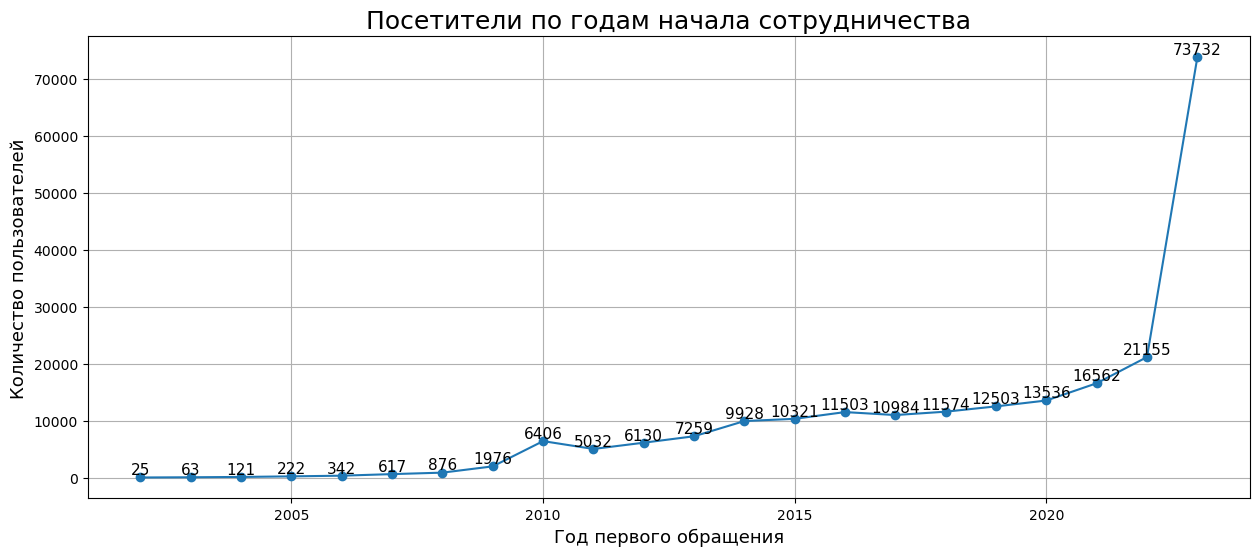

In [33]:
year_dinamique.plot(figsize=(15, 6), grid=True, marker='o')
for i, j in zip(year_dinamique.index, year_dinamique.values):
        plt.text(i,j, str(j), ha='center', va='bottom', fontsize=11)
plt.xlabel('Год первого обращения', fontsize=13)
plt.ylabel('Количество пользователей', fontsize=13)
plt.title('Посетители по годам начала сотрудничества', fontsize=18)
plt.show()

Видим, что подавляющее большинство клиентов, посетивших клинику в 2023 году, и сотрудничать начали в 2023 году.
Но заметно и то, что много клиентов, кто пришел в 2010-2022 годы. Есть и те, кто стал клиентом еще в нулевых.

### 3.3 Взглянем, насколько давно с клиникой клиенты из датафрейма

In [34]:
remoteness = df.groupby('client_remoteness')['id'].nunique()

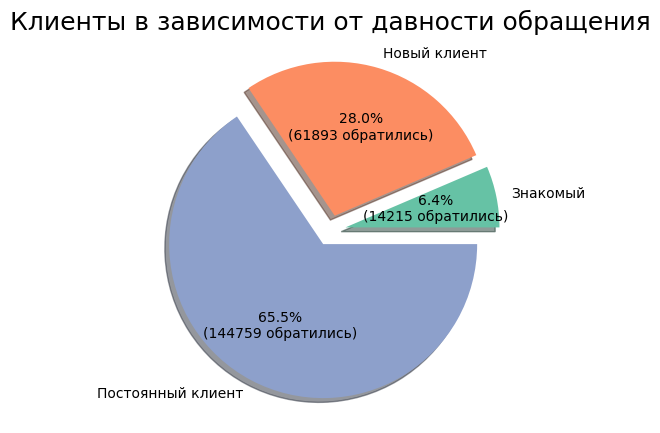

In [35]:
def func_count_clients(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%\n({absolute:d} обратились)" # корректируем функцию, чтобы она показывала кол-во обращений

fig = plt.figure(figsize =(5, 5))
plt.pie(remoteness.values, labels = remoteness.index, shadow=True, colors=sns.color_palette('Set2'), 
        explode=[0.1, 0.1, 0.1], autopct=lambda pct: func_count_clients(pct, remoteness.values))
plt.title("Клиенты в зависимости от давности обращения", fontsize=18)
plt.show()

Очень неплохо. 65,5% обратившихся клиентов с клиникой уже точно больше полугода. В статусе "Знакомого" (сотрудничают от 1 мес. до 6 мес.) еще 6,4%. И только 28% новые клиенты, которые, впрочем, тоже могут стать постоянными.

### 3.4 В какие месяцы клиенты из датафрейма начинали сотрудничать?

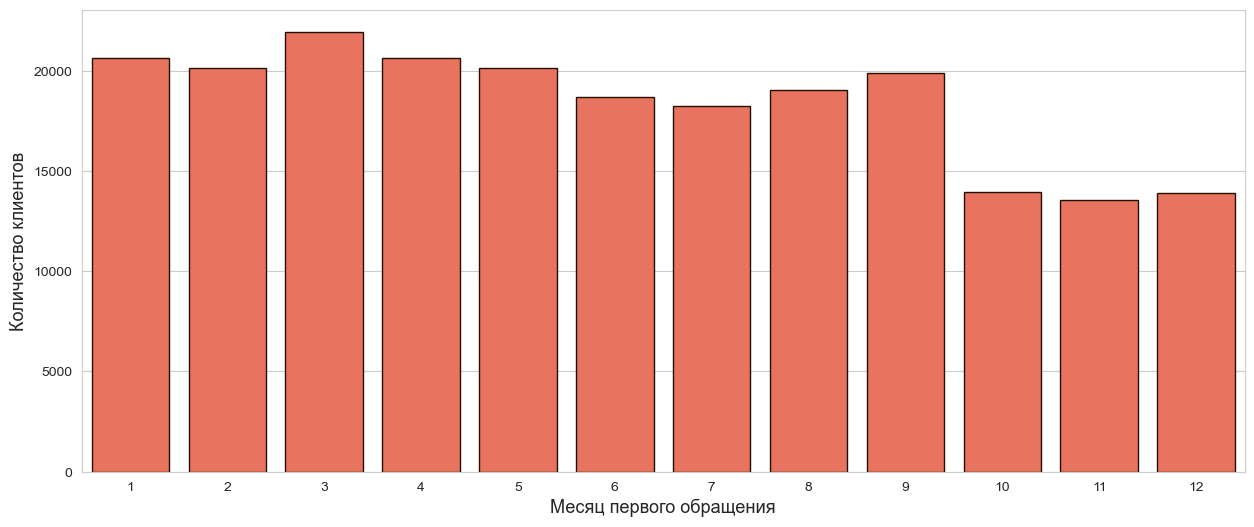

In [36]:
month_dinamique = df.groupby('month_joining')['id'].nunique().sort_values(ascending=False)
sns.set_style("whitegrid")
plt.figure(figsize=(15,6))
sns.barplot(x=month_dinamique.index, y=month_dinamique.values, color='tomato', edgecolor='#221100')
plt.xlabel('Месяц первого обращения', fontsize=13)
plt.ylabel('Количество клиентов', fontsize=13)
plt.show()

Пик приходится на март. Также неплохо показали себя январь и апрель.

Некоторая просадка чувствуется летом, особенно в июне-июле. Это сезон отпусков, так что клиенты скорее всего думают о морях, а не о здоровье.

Также, есть весомая просадка на октябрь, ноябрь и декабрь, что наводит на мысль о том, что в эти месяцы более слабый приток клиентов и его надо как-то стимулировать. Но, учитывая, что в датафрейме данные только за январь-сентябрь 2023 года, а выше мы видели, что в 2023 году наиболее активно посещали клинику пациенты именно 2023 года начала сотрудничества, логично будет предположить, что такое **снижение вызвано**, скорее всего, **нехваткой данных** за октябрь-декабрь в этом году и нуждается в дальнейшем наблюдении.

### 3.5 Помесячное количество оказанных услуг

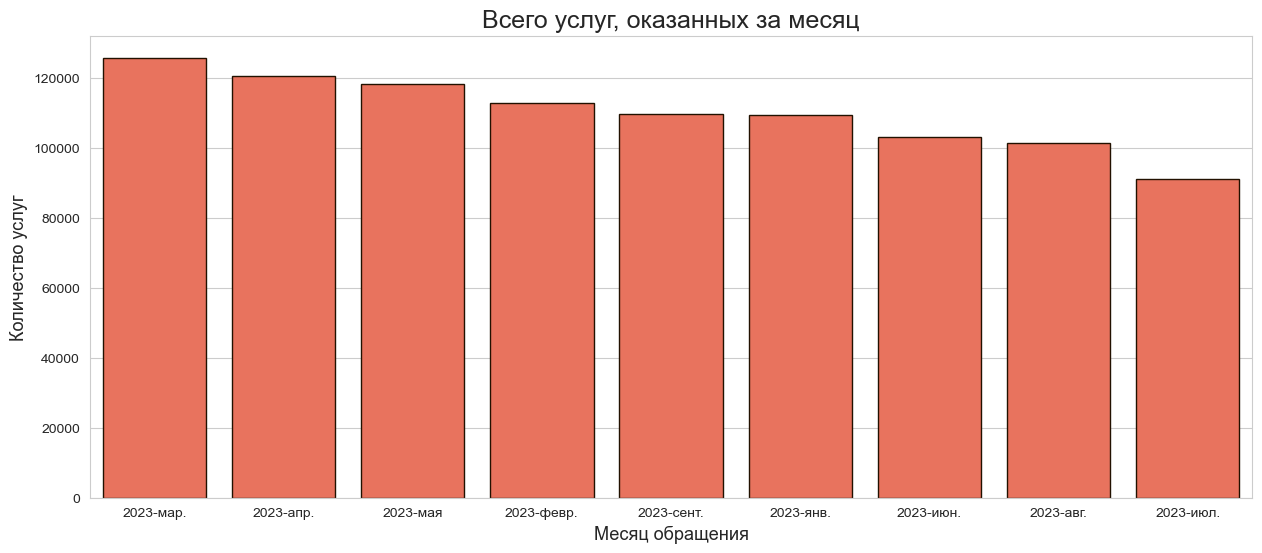

In [37]:
sum_services = df.groupby('period')['count_services'].sum().sort_values(ascending=False)
plt.figure(figsize=(15,6))
sns.barplot(x=sum_services.index, y=sum_services.values, color='tomato', edgecolor='#221100')
plt.title("Всего услуг, оказанных за месяц", fontsize=18)
plt.xlabel('Месяц обращения', fontsize=13)
plt.ylabel('Количество услуг', fontsize=13)
plt.show()

Больше всего услуг клиника оказала в марте, апреле и мае.

Меньше всего услуг было оказано в летние месяцы, особенно в июле.

### 3.6 Помесячное количество оказанных услуг каждым филиалом

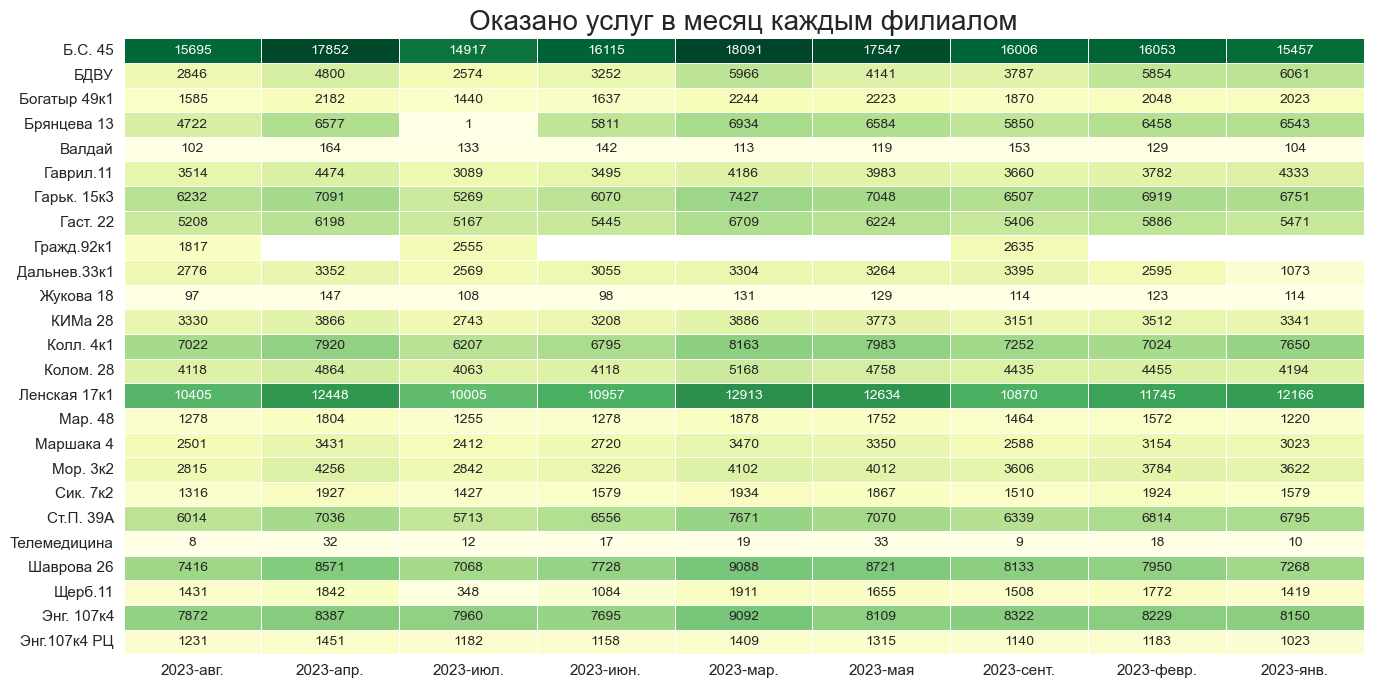

In [38]:
plt.figure(figsize=(16,8))
g = sns.heatmap(
        df
        .pivot_table(index='branch', columns='period', values='count_services', aggfunc='sum'),
        linewidths= .6, annot=True, fmt=".15g", cmap='YlGn', cbar=False
    )
g.set(ylabel=None, xlabel=None)
plt.tick_params(axis='both', which='major', labelsize=11)
plt.title('Оказано услуг в месяц каждым филиалом', fontsize=20)
plt.show()

Видим, что наибольшее количество услуг приходится на клиники на Б.С.45 и Ленской 17к1. Также популярны клиники на Энг.107к4, Шаврова 26, Колл4к1.

Реже посещали отделения на Жукова 18 и в Валдае.

Для всех отделений тоже прослеживается сезонность - светлее данные, потому что их меньше, в летние месяцы. Темнее в апреле, мае, марте, зимой.

### 3.7 Помесячное количество оказанных услуг каждым подразделением

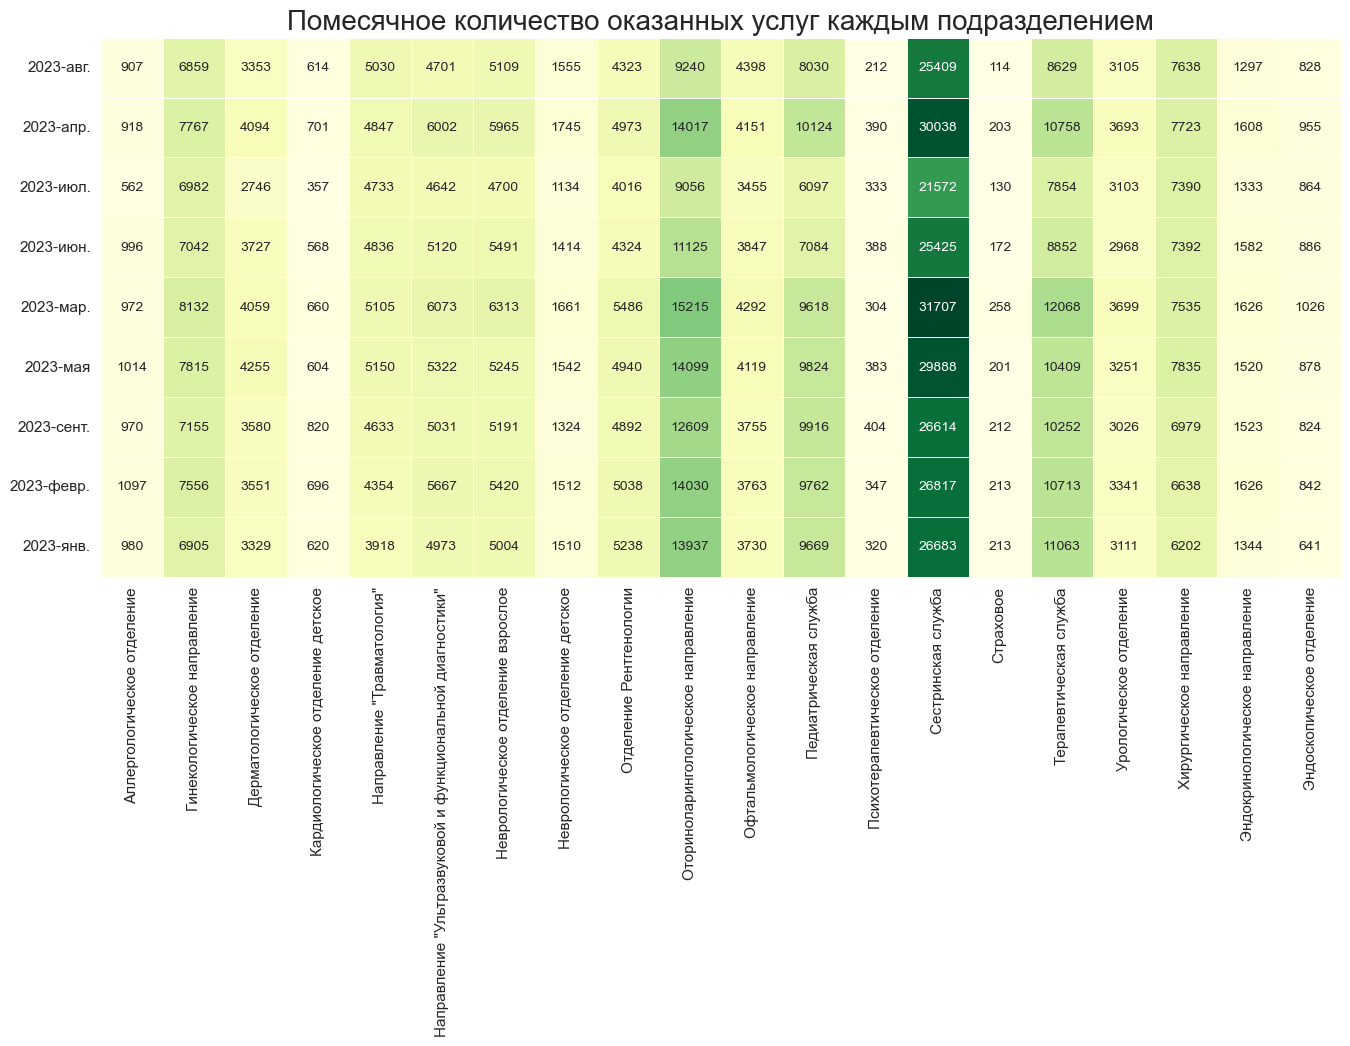

In [39]:
plt.figure(figsize=(16,7))
g = sns.heatmap(
        df
        .pivot_table(index='period', columns='department', values='count_services', aggfunc='sum'),
        linewidths= .6, annot=True, fmt=".15g", cmap='YlGn', cbar=False
    )
g.set(ylabel=None, xlabel=None)
plt.tick_params(axis='both', which='major', labelsize=11)
plt.title('Помесячное количество оказанных услуг каждым подразделением', fontsize=20)
plt.show()

Больше всего услуг было оказано сестринской службой.

Из врачебных подразделений больше всего услуг оказывают отоларингологическое направление, терапевтическая служба, педиатрическая служба, гинекология, хирургия. 

Меньше всего услуг оказывает психотерапевтическое отделение, страховое, эндоскопическое отделение и детская кардиология. 

Сезонность тоже заметна - кол-во услуг, оказываемых клиникой, снижается в летние месяцы.

### 3.8 Какие конкретно услуги оказывались в разные месяцы 2023-го года?

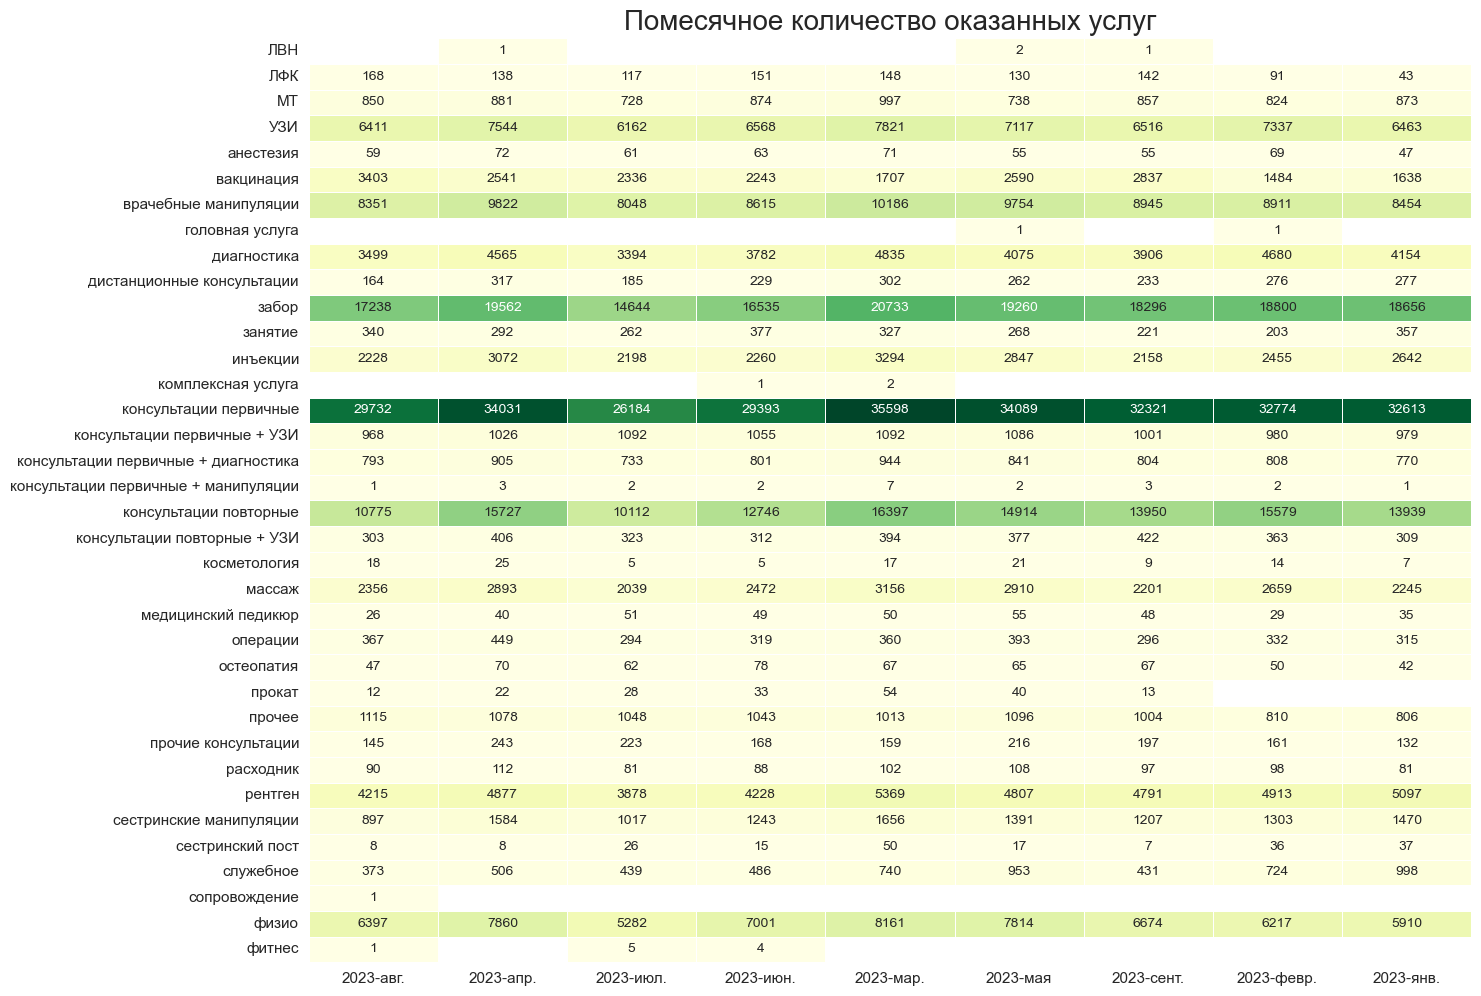

In [40]:
plt.figure(figsize=(15,12))
g = sns.heatmap(
        df
        .pivot_table(index='service_category', columns='period', values='count_services', aggfunc='sum'),
        linewidths= .6, annot=True, fmt=".15g", cmap='YlGn', cbar=False
    )
g.set(ylabel=None, xlabel=None)
plt.tick_params(axis='both', which='major', labelsize=11)
plt.title('Помесячное количество оказанных услуг', fontsize=20)
plt.show()

А вот этот график дает ответ на вопрос почему сестринская служба лидер по оказанию услуг: есть много массовых услуг, таких как забор и физио, и услуг поменьше, а-ля вакцинация, инъекции, которые обычно выполняются медсестрами. В сумме они и дают большое количество оказанных услуг.

Помимо этого видим, что пациенты клиники часто приходят на первичные и повторные консультации, врачебные манипуляции, УЗИ, рентген.

Реже всего оказываются такие услуги, как косметология, прокат, остеопатия, фитнес. Тут есть, куда расти.

## 4 Исследовательский анализ данных

### 4.1 Консультации у врачей с званием и без

Углубим анализ. Выделим отдельно услуги консультации и посмотрим есть ли какая-то разница между тем, когда пациент посещает врача со званием (зав. отделением, профессор, ведущий специалист, главный специалист) и без званий.

In [41]:
# Список услуг-консультаций
service_list = ['дистанционные консультации', 'консультации первичные', 'консультации первичные + УЗИ', 
                'консультации первичные + диагностика', 'консультации повторные', 'консультации повторные + УЗИ']

services_regalia = (
    df.query('service_category in @service_list') # ссылаемся на список
    .groupby(['regalia', 'service_category'])['count_services'] # группируем по услугам, званиям, считаем оказанные услуги 
    .sum()
    .reset_index()
)

# Выделяем отдельные таблицы для врачей с и без званий:
yes_regalia = services_regalia.query('regalia == "Есть звание"').sort_values(by='count_services', ascending=False)
no_regalia = services_regalia.query('regalia == "Нет звания"').sort_values(by='count_services', ascending=False)

In [42]:
# Создаем совмещенный график с 2-мя линейными графиками. Для каждого прописываем свое название: 
fig = make_subplots(rows=1, cols=2, shared_yaxes=True,
                    subplot_titles=("Услуги врачей со званиями", "Услуги врачей без званий"))

fig.add_trace(go.Bar(x=yes_regalia['service_category'], y=yes_regalia['count_services'], 
                     text=yes_regalia['count_services']), 1, 1)

fig.add_trace(go.Bar(x=no_regalia['service_category'], y=no_regalia['count_services'], 
                     text=no_regalia['count_services'],), 1, 2)

# Прописываем цвет, название графика и оси у:
fig.update_layout(showlegend=False, yaxis_title_text="Оказано услуг", width=980, height=700,
                  title_text="Количество оказанных услуг в зависимости от наличия звания у врача", font=dict(size=12))
fig.update_traces(marker_color="LightSeaGreen", textposition = "outside")
fig.update_xaxes(tickangle=90)
fig.show()

Первичные консультации чаще берут у врачей без званий, что может объясняться тем, что таких врачей обычно больше и их услуги стоят несколько дешевле. 

Однако интересно не это, а то, что если сравнить отношение первичных и повторных консультаций, то заметно, что у врачей без звания количество повторных консультаций в 2,6 раз меньше чем первичных. В то время как у врачей со званием повторные консультации оказываются реже первичных в 1,97 раз. Это указывает на то, что врачи со званием могут больше привлекать пациентов для повторного визита. А судя по показателям повторных консультаций с УЗИ, еще и дополнительно стимулировать пациентов не только на консультацию, но и на услугу УЗИ.

### 4.2 Влияние наличия звания у врача на взрослую/детскую медицину

Посмотрим, обращают ли на звание внимание клиенты с разным типом медицины. Так как рассматриваем именно врачей, снова обратимся к фильтру по услугам @service_list, где будут именно консультации, в которых фигурирует или не фигурирует звание.

In [43]:
mdv_clients_regalia = (
    df.query('service_category in @service_list')
    .groupby(['regalia', 'mdv'])['count_services']
    .sum()
    .reset_index()
)

md_clients_regalia = mdv_clients_regalia.query('mdv == "МД"')
mv_clients_regalia = mdv_clients_regalia.query('mdv == "МВ"')

In [44]:
# Создаем совмещенный график, прописывая, что на 1 строке у нас их 2.'domain' type прописываем, так как у нас Pie-диаграммы:
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]],
                   subplot_titles=['Детская медицина', 'Взрослая медицина'])

# Для каждого круга прописываем параметры и названия:
fig.add_trace(go.Pie(labels=md_clients_regalia['regalia'], values=md_clients_regalia['count_services'], 
                     pull=[0.1, 0], rotation = 180), 1, 1)
fig.add_trace(go.Pie(labels=mv_clients_regalia['regalia'], values=mv_clients_regalia['count_services'], 
                     pull=[0.1, 0], rotation = 180), 1, 2)

# Корректируем параметры текста и размер графика:
fig.update_layout(font={'size': 10.5}, height = 480,
                  title={'text': '<b>Обращения к врачу со званием и без в зависимости от типа медицины</b>', 
                         'font': {'size': 20}}, showlegend=False)
fig.update_traces(textinfo='label+value', marker=dict(line=dict(color='#000000', width=1)))
fig.show()

Видим, что взрослые пациенты немного чаще обращаются к врачу со званием. Но уверенно это сказать нельзя: может быть и так, что услуги такого врача может оплачивать рабочая ДМС, а значит на более высокую цену проще решиться. Или же врачей со званием во взрослом отделении больше.

### 4.3 Медицина какого типа, - взрослая или детская, - преобладает по количеству оказанных услуг?

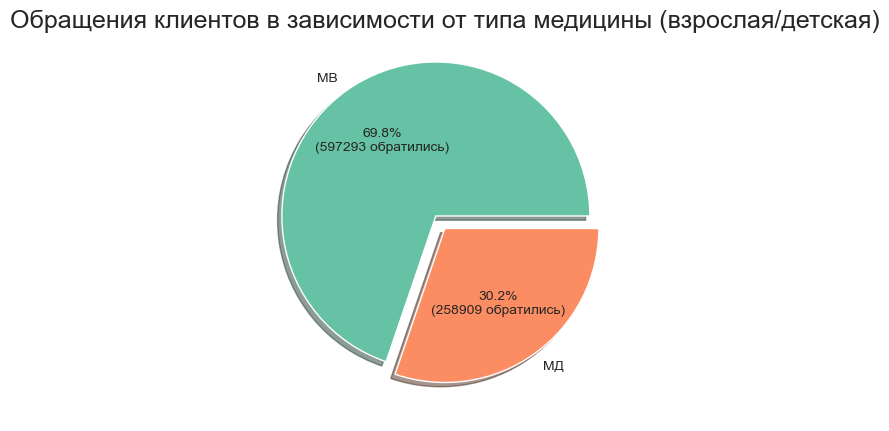

In [45]:
def func_count_clients(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%\n({absolute:d} обратились)" # корректируем функцию, чтобы она показывала кол-во обращений

mdv_type = df.groupby('mdv')['mdv'].count()
fig = plt.figure(figsize =(5, 5))
plt.pie(mdv_type.values, labels = mdv_type.index, shadow=True, colors=sns.color_palette('Set2'), 
        explode=[0.1, 0.0], autopct=lambda pct: func_count_clients(pct, mdv_type.values))
plt.title("Обращения клиентов в зависимости от типа медицины (взрослая/детская)", fontsize=18)
plt.show()

Большинство обращений связано со взрослой медициной - 69.8%. 

30.2% обращений относятся к детской медицине.

### 4.3 Какого возраста чаще всего оказываются пациенты-взрослые и пациенты-дети?

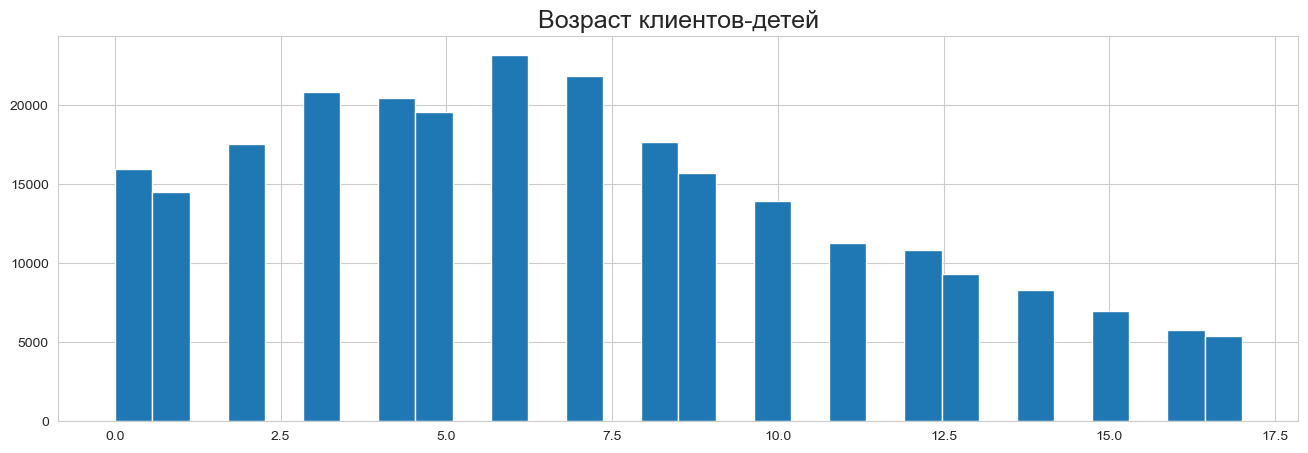

In [46]:
md_clients_age = df.query('mdv == "МД"')
mv_clients_age = df.query('mdv == "МВ"')

plt.figure(figsize=(16,5))
md_clients_age.age.hist(bins=30)
plt.title("Возраст клиентов-детей", fontsize=18)
plt.show()

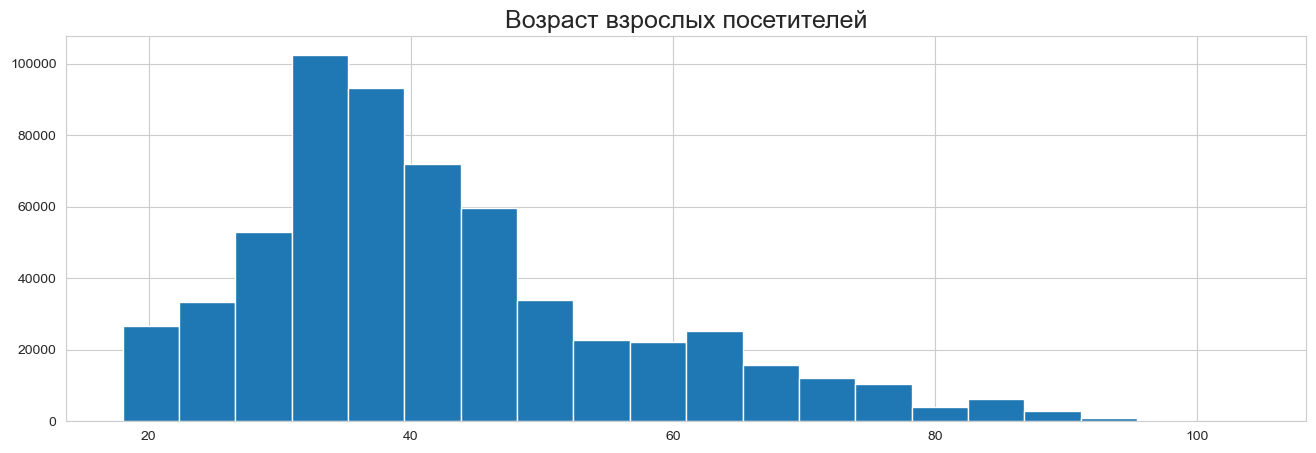

In [47]:
plt.figure(figsize=(16,5))
mv_clients_age.age.hist(bins=20)
plt.title("Возраст взрослых посетителей", fontsize=18)
plt.show()

Основное количество детей пациентов приходится на возраст 0-9 лет.

Взрослых же пациентов больше всего в возрасте от 28 до 44 лет.

### 4.4 Где предпочитают получать услуги взрослые и дети?

In [48]:
mdv_clients = (
    df
    .groupby(['mdv', 'in_ambulatory'])['count_services']
    .sum()
    .reset_index()
)

md_clients = mdv_clients.query('mdv == "МД"')
mv_clients = mdv_clients.query('mdv == "МВ"')

In [49]:
# Создаем совмещенный график, прописывая, что на 1 строке у нас их 3.'domain' type прописываем, так как у нас Pie-диаграммы:
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]],
                   subplot_titles=['Детская медицина', 'Взрослая медицина'])

# Для каждого круга прописываем параметры и названия:
fig.add_trace(go.Pie(labels=md_clients['in_ambulatory'], values=md_clients['count_services'], 
                     pull=[0.1, 0], rotation = 180), 1, 1)
fig.add_trace(go.Pie(labels=mv_clients['in_ambulatory'], values=mv_clients['count_services'], 
                     pull=[0.17, 0], rotation = 180), 1, 2)

# Корректируем параметры текста и размер графика:
fig.update_layout(font={'size': 10.5}, height = 480,
                  title={'text': '<b>Амбулаторные/удаленные услуги в зависимости от типа медицины</b>', 'font': {'size': 20}},
                  showlegend=False)
fig.update_traces(textinfo='label+value', marker=dict(line=dict(color='#000000', width=1)))
fig.show()

Несмотря на визуальное сходство, в случае с детьми клиенты явно чаще заказывают дистанционные услуги/на дом. Это видно по соотношению показателей. В случае детской медицины на 16,3 амбулаторных посещения приходится 1 посещение удаленно/на дому, в то время как во взрослой на 1 удаленную/домашнюю услугу приходится 30,6 амбулаторных посещений.

Построим "ящики с усами" для посетителей, которые покажут распределение возраста пациентов и их пользование услугами на дому/удаленно или в амбулатории.

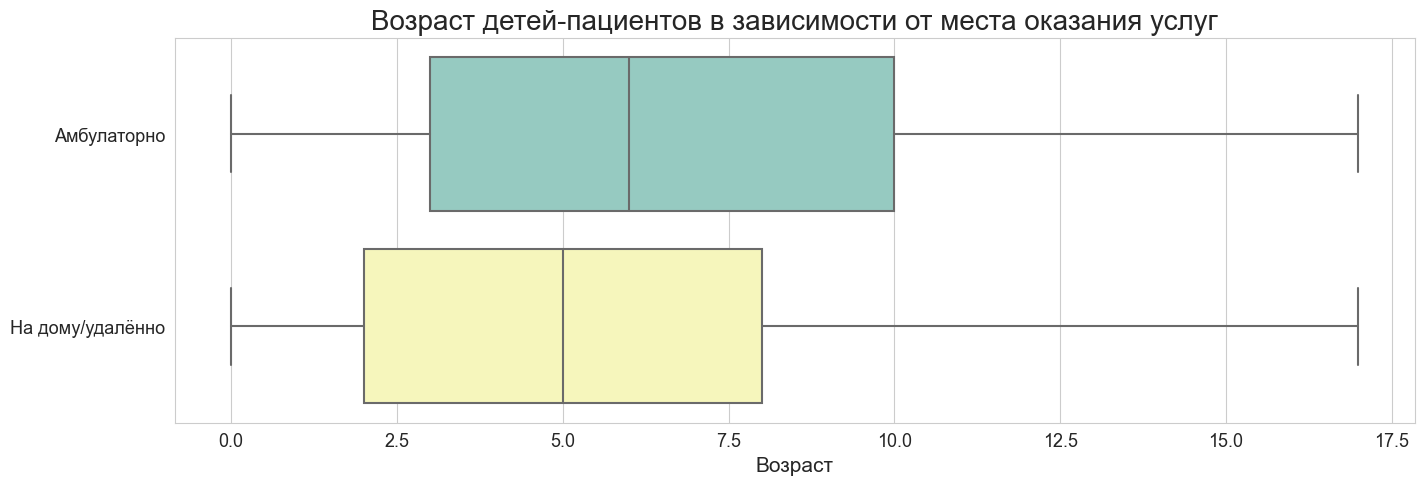

In [50]:
plt.figure(figsize=(16,5))
g = sns.boxplot(data=md_clients_age, x="age", y="in_ambulatory", palette='Set3')
g.set_ylabel('')
g.set_xlabel('Возраст', fontsize=15)
g.tick_params(labelsize=13)
plt.title('Возраст детей-пациентов в зависимости от места оказания услуг', fontsize=20)
plt.show()

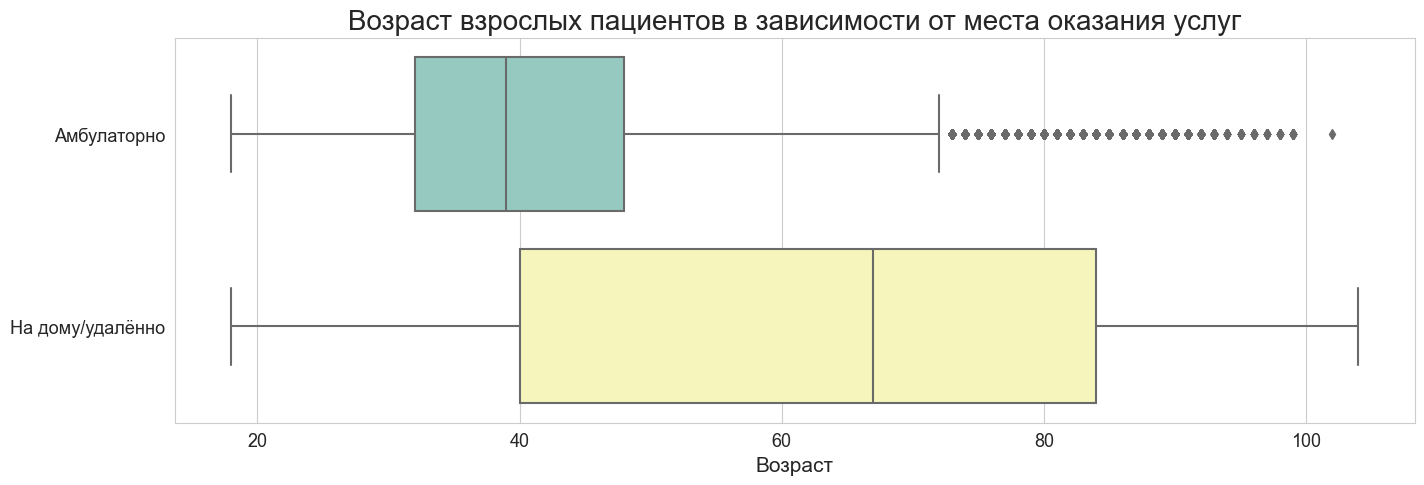

In [51]:
plt.figure(figsize=(16,5))
g = sns.boxplot(data=mv_clients_age, x="age", y="in_ambulatory", palette='Set3')
g.set_ylabel('')
g.set_xlabel('Возраст', fontsize=15)
g.tick_params(labelsize=13)
plt.title('Возраст взрослых пациентов в зависимости от места оказания услуг', fontsize=20)
plt.show()

По графику для детей видим, что домашние/удаленные услуги более характерны для детей помладше - по медиане понятно, что половина пользователей этих услуг находится в возрасте 0-5 лет; 75% пациентов, судя по верхнему квантилю, укладываются в возраст до 8 лет.

В то же время, амбулаторные посещения характерны для детей постарше - медиана здесь 6 лет, а верхний квартиль (75%) - 10 лет.

У взрослых всё наоборот: амбулаторные посещения характерны для 75% клиентов от 32-34 и до примерно 46-48 лет. А вот для удаленных посещений/визитов на дом возраст пациентов в 75% случаев укладывается в рамки 40-83 года, при этом медиана тут около 70 лет.

Вероятно в случае как с маленькими детьми, так и с пожилыми взрослыми сказывается пониженная мобильность этих групп клиентов.

### 4.5 Как возраст пациентов сказывается на посещении отдельных подразделений клиники?

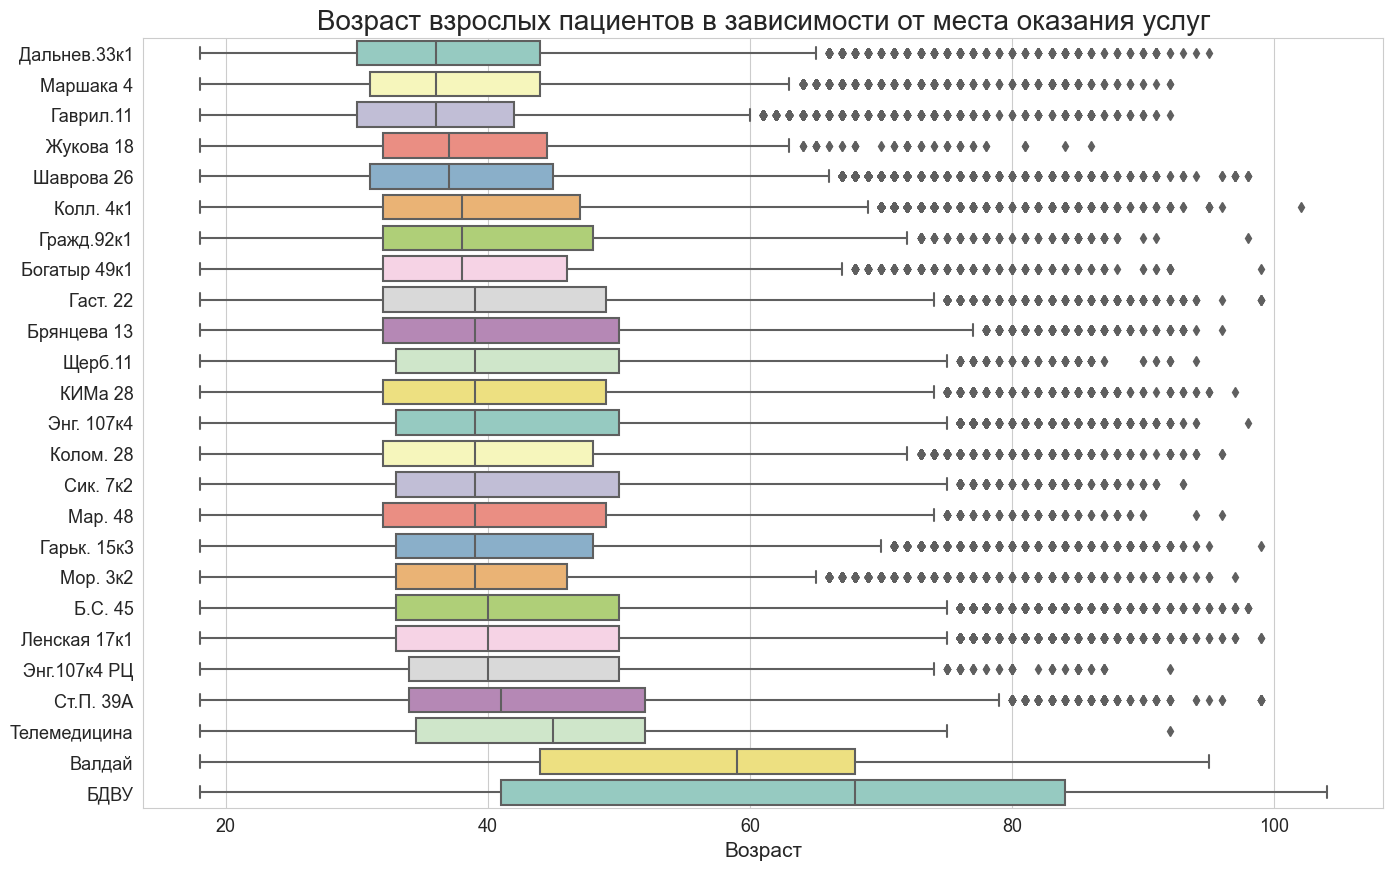

In [52]:
plt.figure(figsize=(16,10))
g = sns.boxplot(data=mv_clients_age, x="age", y="branch", palette='Set3', 
                order=mv_clients_age.groupby('branch')['age'].agg('median').sort_values().index)
g.set_ylabel('')
g.set_xlabel('Возраст', fontsize=15)
g.tick_params(labelsize=13)
plt.title('Возраст взрослых пациентов в зависимости от места оказания услуг', fontsize=20)
plt.show()

Для взрослых пациентов весомых различий не видно - медиана плюс-минус в пределах 36-40 лет, кроме подразделений Телемедицины, БДВУ, которыми чаще пользуются пациенты постарше. Пациенты в Валдае тоже в большинстве случаев старше, чем в целом по базе - 75% укладываются в рамки от 43-44 и до 66-67 лет. Однако следует помнить, что по этому отделению меньше данных, чем по остальным. Возможно, с накоплением данных ситуация изменится.

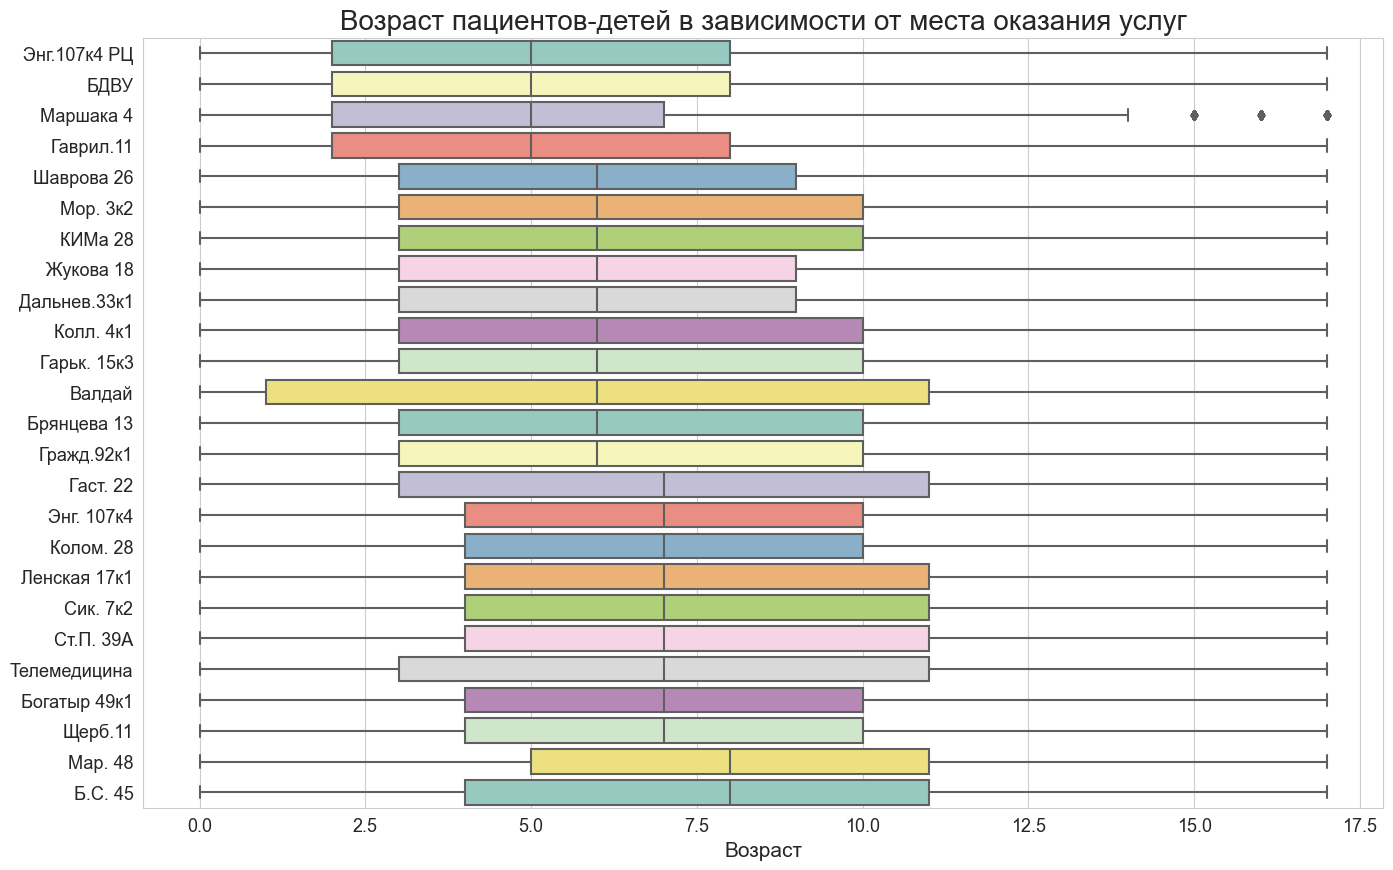

In [53]:
plt.figure(figsize=(16,10))
g = sns.boxplot(data=md_clients_age, x="age", y="branch", palette='Set3', 
                order=md_clients_age.groupby('branch')['age'].agg('median').sort_values().index)
g.set_ylabel('')
g.set_xlabel('Возраст', fontsize=15)
g.tick_params(labelsize=13)
plt.title('Возраст пациентов-детей в зависимости от места оказания услуг', fontsize=20)
plt.show()

А вот с детьми картинка немного интереснее. Видно, что клиенты с детьми помладше чаще обращаются в отделения на Энг.107к4 РЦ, БДВУ, Маршака 4, Гаврил. 11. Здесь большая часть маленьких пациентов укладывается в возраст 2-8 лет. Другие отделения чаще принимают пациентов постарше - в основном, в пределах 3-10 лет и 4-11.

Сильная разбросанность видна у отделения на Валдае, что, опять же, скорее всего, связано с небольшим количеством данных по сравнению с другими отделениями и, соответственно, с большей волатильностью в связи с этим.

### 4.6 Какого возраста пациенты, посещающие отдельные службы?

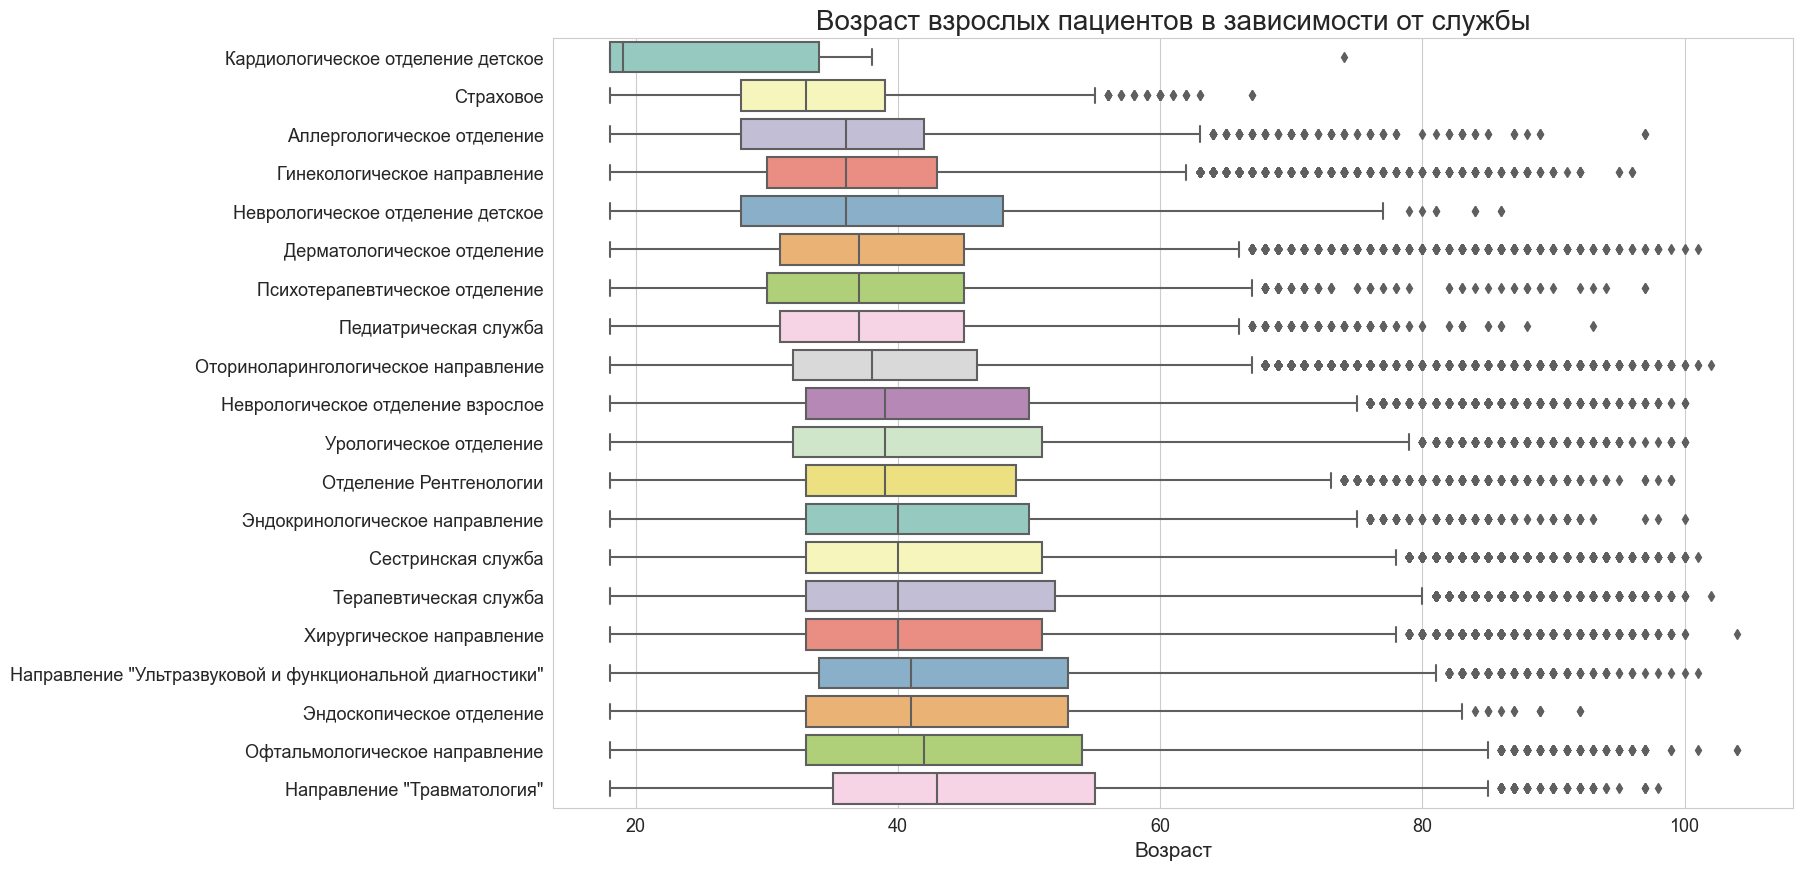

In [54]:
plt.figure(figsize=(16,10))
g = sns.boxplot(data=mv_clients_age, x="age", y="department", palette='Set3', 
                order=mv_clients_age.groupby('department')['age'].agg('median').sort_values().index)
g.set_ylabel('')
g.set_xlabel('Возраст', fontsize=15)
g.tick_params(labelsize=13)
plt.title('Возраст взрослых пациентов в зависимости от службы', fontsize=20)
plt.show()

Видим, что страховое, аллергологическое, гинекологическое, дерматологическое, психотерапевтическое и отоларингологическое отделения несколько "помоложе" - их посещают в основном пациенты от 28 до 45-46 лет. Медиана в основном в районе 35-38 лет.

А вот начиная с взрослой неврологии отделения "стареют": основные посетители в возрасте от 33-35 до 55 лет с медианным возрастом от 38-39 до 43-44 лет.

Однако видны интересные аномалии - взрослые, судя по графику, посещают детские отделения кардиологии, неврологии и педиатрии. Посмотрим, какие услуги они там получают:

In [55]:
df.query('mdv == "МВ" and department == "Неврологическое отделение детское" or mdv == "МВ" and department == \
         "Педиатрическая служба" or mdv == "МВ" and department == "Кардиологическое отделение детское"') \
         ['service_category'].value_counts()

вакцинация                    4078
прочее                         224
консультации первичные         143
прочие консультации            107
диагностика                     64
УЗИ                             27
консультации повторные          19
остеопатия                       6
дистанционные консультации       5
забор                            4
служебное                        4
врачебные манипуляции            1
Name: service_category, dtype: int64

Видим, что в основном взрослые в этих отделениях пользуются услугами вакцинации, однако есть и около 400 (суммарно) консультаций, диагностик, УЗИ и прочего, что тоже прошло через детские отделения, хотя посетители были взрослыми. Часть можно объяснить тем, что бывают специалисты, которые ведут и детское, и взрослое направление, вакцинации могут быть приписаны к детскому отделению.

Взглянем на возраст детей-пациентов в зависимости от службы.

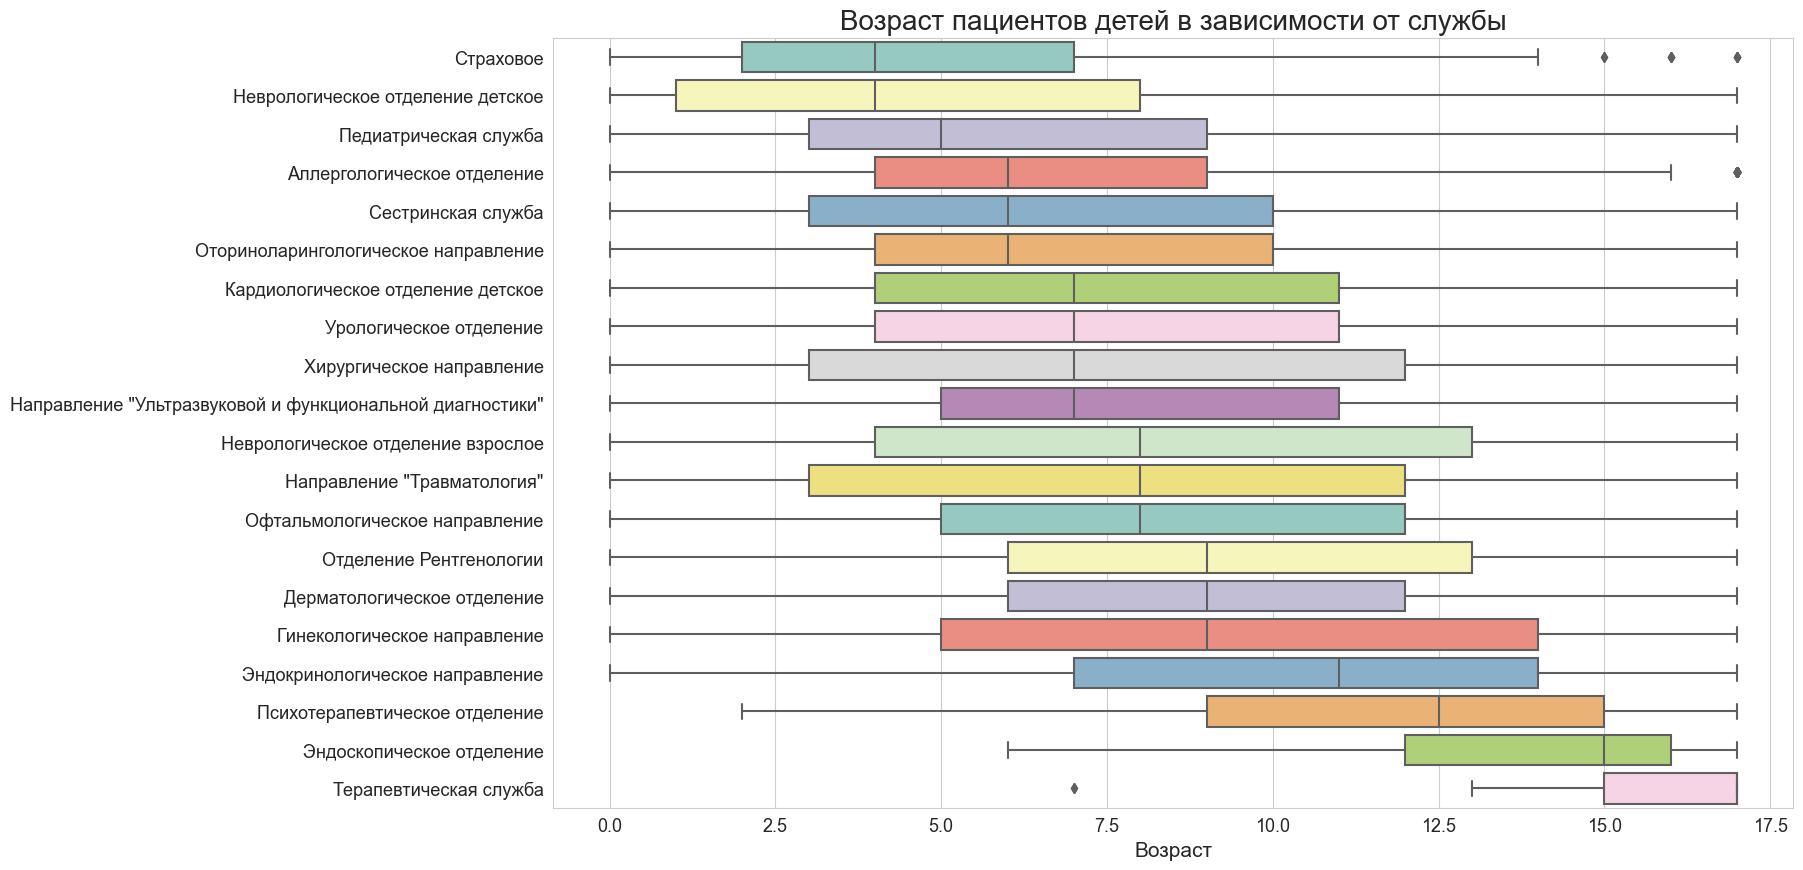

In [56]:
plt.figure(figsize=(16,10))
g = sns.boxplot(data=md_clients_age, x="age", y="department", palette='Set3', 
                order=md_clients_age.groupby('department')['age'].agg('median').sort_values().index)
g.set_ylabel('')
g.set_xlabel('Возраст', fontsize=15)
g.tick_params(labelsize=13)
plt.title('Возраст пациентов детей в зависимости от службы', fontsize=20)
plt.show()

Видим, что пациенты помладше чаще всего встречаются в страховом, неврологическом детском отделении и в педиатрической службе. Тут возраст большинства пациентов не превышает 9 лет. Медиана возраста - 4 года.

От аллергологии до дерматологии включительно медианный возраст пациентов плавно растет, но основная масса пациентов в возрасте от 3 до 12 лет.

А вот гинекология, эндокринология, эндоскопическое и психотерапевтическое отделения явно для пациентов постарше - от 5 до 16 лет. Медиана растет быстро. В гинекологии она 9 лет, в эндокринологии уже 11, в психотерапевтическое отделение - 12,5, а в эндоскопическом отделении медиана 15.

Как и в случае со взрослой медициной, видим здесь аномалии - неврологическое взрослое отделение и терапевтическую службу. Посмотрим, какими в основном услугами пользовались клиенты детской медицины в этих отделениях.

In [57]:
df.query('mdv == "МД" and department == "Неврологическое отделение взрослое" or mdv == "МД" and department == \
         "Терапевтическая служба"')['service_category'].value_counts()

консультации первичные                  205
остеопатия                              179
МТ                                       15
консультации повторные                   12
диагностика                               9
прочее                                    8
физио                                     2
врачебные манипуляции                     1
консультации первичные + диагностика      1
Name: service_category, dtype: int64

Опять же, видим консультации, что может объясняться врачом, который лечит и взрослых, и детей. Но есть и другие услуги.

В целом же, ситуацию с услугами детской медицины для взрослых и наоборот можно будет поисследовать глубже, чтобы выяснить отчего такие аномалии возникают и аномалии ли это вообще.

Посмотрим возраст пациентов в разрезе служб немного поглубже.

### 4.7 Как часто пациенты той или иной возрастной группы посещают отдельные службы?

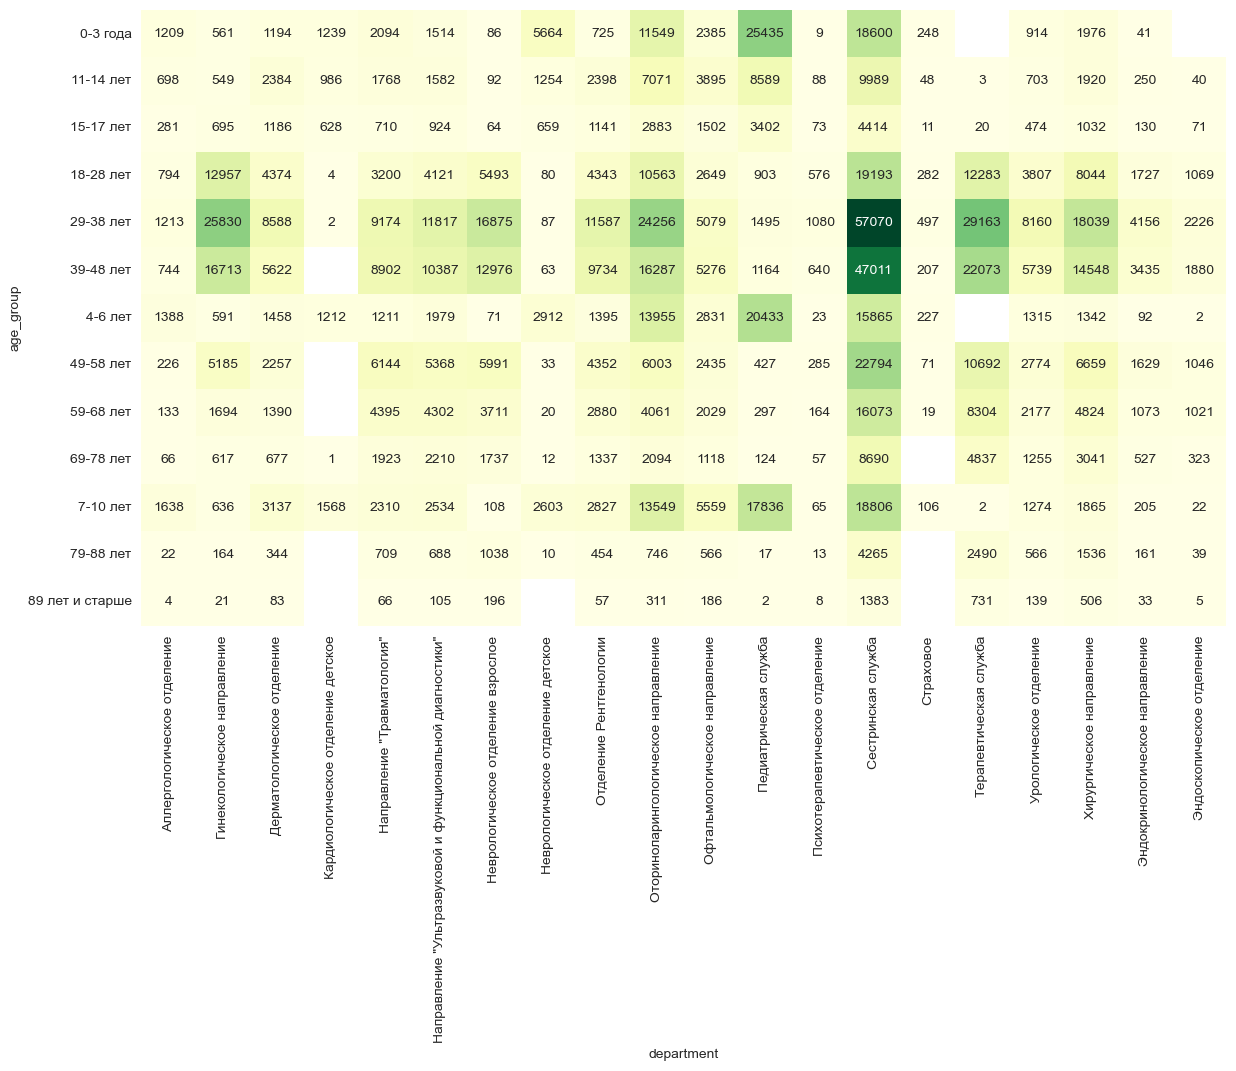

In [58]:
# код ревьюера
plt.figure(figsize=(14, 8))
sns.heatmap(pd.pivot_table(df, 
                           index='age_group', 
                           columns='department', 
                           values='count_services',
                           aggfunc='sum'),
           cbar=False,
           cmap='YlGn',
           annot=True,
           fmt='.0f');

Видим, что услугами сестринской службы, опять же, пользуется много людей вне зависимости от возраста.

В остальном же, если брать детей, то они чаще всего посещают педиатрическую, отоларингологическую, неврологическую, дерматологическую службы. При этом неврологическая, педиатрическая и отоларингологическая службы более популярны у детей помладше с тенденцией к понижению количества услуг с более старшим возрастом пациента. Популярность дерматологии напротив несколько повышается с возрастом.

Если взглянуть на взрослых, то видим, что больше всего услуг оказывается пациентам в возрасте 18-48 лет. Из этой группы больше всего услуг предоставляется пациентам 29-38 лет. Наиболее популярные направления - терапия, отоларингология, гинекология. Меньше услуг оказали, но также выделяются, хирургическое отделение, направление УЗИ и функциональной диагностики, взрослая неврология, травматология и урология.

Поменьше возрастная категория 49-78 лет. Для этой категории больше всего услуг было оказано хирургией, терапией и травматологией.

### 4.8 Как пациенты оплачивают услуги клиники?

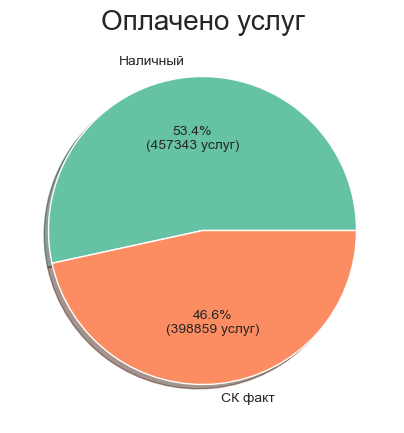

In [59]:
def func_count_services(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%\n({absolute:d} услуг)" # корректируем функцию, чтобы она показывала кол-во обращений

clients_type = df.groupby('client_category')['client_category'].count()
fig = plt.figure(figsize =(5, 5))
plt.pie(clients_type.values, labels = clients_type.index, shadow=True, colors=sns.color_palette('Set2'), 
        autopct=lambda pct: func_count_services(pct, clients_type.values))
plt.title("Оплачено услуг", fontsize=20)
plt.show()

Большая часть (53,4%) услуг оплачена наличным расчетом. Через страховую оплачено 46.6% услуг.

### 4.9 Зависит ли тип оплаты от возраста пациента?

In [60]:
pay_type = df.groupby(['client_category', 'age_group'])['count_services'].sum().reset_index()
pay_type_ck = pay_type.query('client_category == "СК факт"')
pay_type_nal = pay_type.query('client_category == "Наличный"')

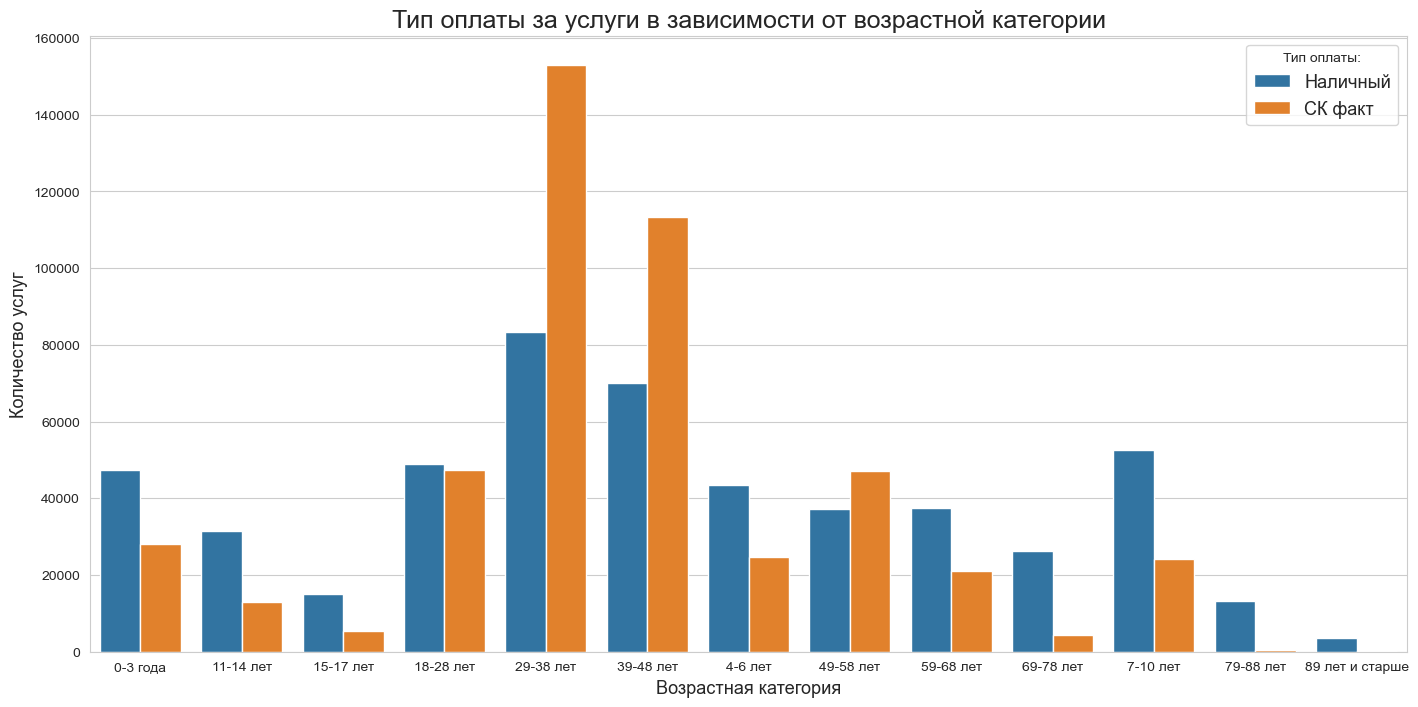

In [61]:
plt.figure(figsize=(17,8))
sns.barplot(x="age_group", y="count_services", hue="client_category", data=pay_type) 
plt.title("Тип оплаты за услуги в зависимости от возрастной категории", fontsize=18)
plt.xlabel('Возрастная категория', fontsize=13)
plt.ylabel('Количество услуг', fontsize=13)
plt.legend(title="Тип оплаты:", fontsize=13)
plt.show()

Видим, что расчеты за пациентов детского возраста, - от 0 до 18 лет, - происходят в основном наличкой. Обращений по страховке меньше примерно в 2 раза.

Пациенты 18-28 лет - примерно 50:50. Кто-то платит наличкой, кто-то по страховке.

А вот пациенты 39-48 и особенно 29-38 лет в 2/3 случаев обращаются по страховке. Возможно, причиной является то, что это наиболее работоспособная часть населения и на работе этому населению выдали ДМС. Группа 49-58 лет тоже чаще предпочитает обращаться по страховке. Хотя и не так часто, как предыдущая.

Начиная с 59 лет люди опять чаще предпочитают платить наличкой. В 69-78 оплата страховкой уже скорее редкость, а после 79 практически не встречается.

### 4.10 Давность знакомства клиента с клиникой и тип оплаты

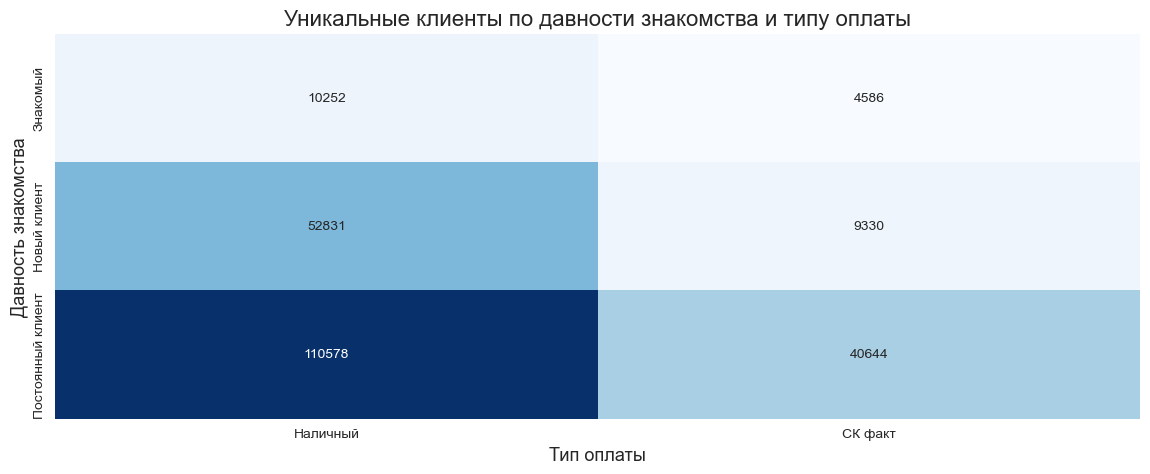

In [62]:
plt.figure(figsize=(14, 5))
sns.heatmap(pd.pivot_table(df, 
                           index='client_remoteness', 
                           columns='client_category', 
                           values='id',
                           aggfunc='nunique'),
           cbar=False,
           cmap='Blues',
           annot=True,
           fmt='.0f');
plt.title("Уникальные клиенты по давности знакомства и типу оплаты", fontsize=16)
plt.xlabel('Тип оплаты', fontsize=13)
plt.ylabel('Давность знакомства', fontsize=13)
plt.show()

Большая часть уникальных клиентов - и постоянных, и новых, и знакомых, - предпочитают оплату наличкой. Тех, кто платит через СК, намного меньше.

### 4.11 Давность знакомства клиента с клиникой и количество приобретенных услуг в зависимости от типа оплаты

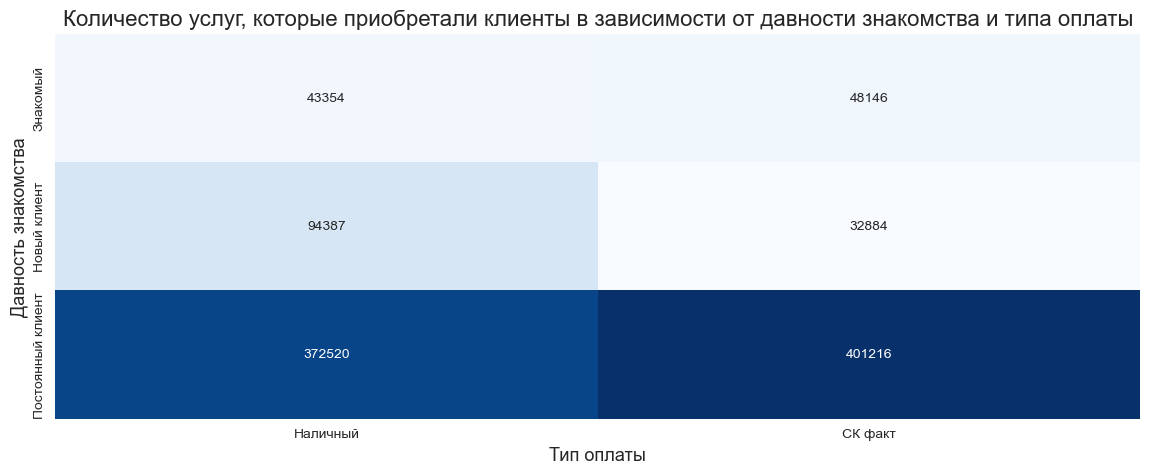

In [63]:
plt.figure(figsize=(14, 5))
sns.heatmap(pd.pivot_table(df, 
                           index='client_remoteness', 
                           columns='client_category', 
                           values='count_services',
                           aggfunc='sum'),
           cbar=False,
           cmap='Blues',
           annot=True,
           fmt='.0f');
plt.title("Количество услуг, которые приобретали клиенты в зависимости от давности знакомства и типа оплаты", fontsize=16)
plt.xlabel('Тип оплаты', fontsize=13)
plt.ylabel('Давность знакомства', fontsize=13)
plt.show()

А вот с количеством оплаченных услуг интереснее. Уникальных клиентов со страховкой примерно в три раза меньше (исходя из кол-ва на графике 4.10), но услуг они при этом приобретают намного больше, чем люди, платящие наличкой.

Уникальных клиентов, платящих наличкой, у нас суммарно 173661, суммарное количество оплаченных ими услуг - 510261. Это значит, что на одного клиента, платящего наличкой, приходится примерно 2,9 услуги.

Страховка у 54560 уникальных клиентов. При этом они оплатили суммарно 482246 услуг. На одного клиента страховой пришлось 8.8 услуг. То, есть страховые клиенты пользуются в 3 раза большим количеством услуг, чем те, кто платит наличкой.

### 4.12 Какие именно услуги приобретают пациенты в зависимости от типа оплаты?

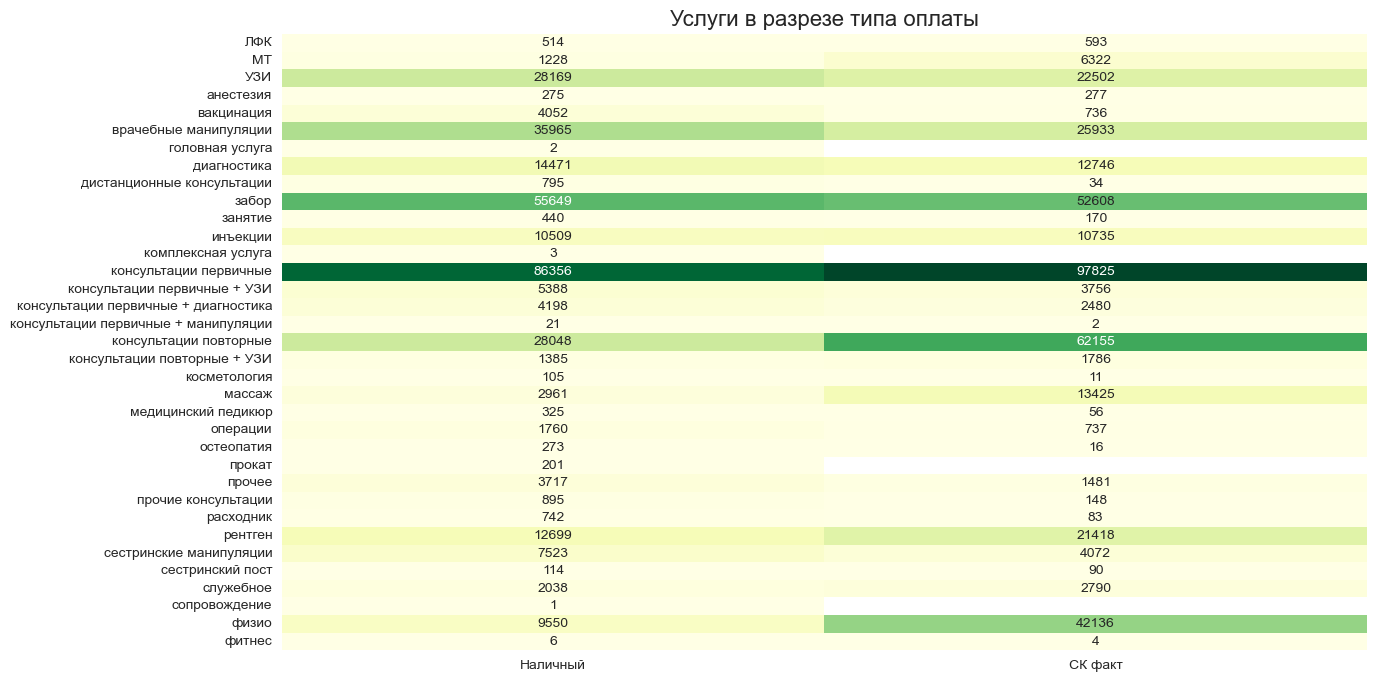

In [64]:
plt.figure(figsize=(14, 8))
sns.heatmap(pd.pivot_table(mv_clients_age, 
                           index='service_category', 
                           columns='client_category', 
                           values='count_services',
                           aggfunc='sum'),
           cbar=False,
           cmap='YlGn',
           annot=True,
           fmt='.0f');
plt.title("Услуги в разрезе типа оплаты", fontsize=16)
plt.xlabel('')
plt.ylabel('')
plt.show()

Есть услуги, которые чаще оплачиваются как наличкой, так и по страховке. Но наиболее любопытная часть на графике - первичные и повторные консультации в разрезе типа оплаты.

Наличкой было оплачено 86356 первичных консультаций, а повторных было уже 28048. То есть, на повторную консультацию возвращались примерно в каждом третьем случае. 

Через страховую было оплачено 97825 первичных консультаций и 62155 повторных. На повторную консультацию возвращались примерно в 1,6 случае.

Также видно, что сравнительно необязательные услуги (в большинстве случаев не жизненно необходимой важности), - массаж и физио, - на порядок чаще оплачивались через страховую.

## Выводы по исследованию
Перед исследованием данные прошли предобработку. Были выполнены следующие работы:
- Названия столбцов заменили на английские;
- Удалили пропуски;
- Изменили тип данных на корректный в столбцах `id`, `start_cooperation`, `age`;
- Обработали аномальные значения в age;
- Перезаписали столбец `age_group`, чтобы устранить ошибки из-за аномалий в `age`, немного укрупнили в нем данные в детской категории - сделали группы 0-3 года и 4-6 лет; 
- Поменяли значения типа "-" в столбцах `icd_decoding`, `icd_code`, `range_icd_codes` на более понятное "Неизвестно";
- Удалили дубль;
- Добавили новые столбцы для анализа:
    1. `days_with_company` - показывает сколько клиент с компанией;
    2. `client_remoteness` - степень знакомства;
    3. `month_joining` и `year_joining` - месяц и год начала сотрудничества;
    4. `regalia` - наличие у врача звания ведущего специалиста, Д.М.Н., профессора, главного специалиста или зав. отделением;
    5. `in_ambulatory` - показывает, где был прием (дома/дистанционно или амбулаторно).

### Общий анализ данных показал следующее:

- За период, представленный в датафрейме (январь-сентябрь 2023 год), **клинику посетило 220867 уникальных клиента**. Всего им **было оказано 992507 услуг**.

- Большая часть клиентов, посетивших клинику в данный период, присоединились к ней в 2023 году. Но много и тех, кто пришел в другие годы - присоединился в 2010-2022 гг. или вообще стал клиентом еще в нулевых.

- Исходя из предоставленных данных, можно сказать, что у клиники довольно много **постоянных клиентов - 65,5%** клиентов из датафрейма уже больше полугода с клиникой. 

- Клиенты несколько **хуже привлекаются в клинику и пользуются услугами в летний период** - в июне, августе и **особенно июле** видна некоторая просадка.

- Из отделений **больше всего услуг оказывают клиники по адресам Б.С.45 и на Ленской 17к1**. Также популярны отделения на Энг. 107к4, Шаврова 26, Колл. 4к1. 

Видно, что многие отделения в летние месяцы проседают по количеству оказываемых услуг и возможно нуждаются в рекламе, стимулирующих акциях, чтобы сохранять поток клиентов. Для популярных отделений это не так критично, а вот филиал на Щерб. 11, к примеру, в июле оказал только 348 услуг, что мало по сравнению хотя бы с июнем - 1084.

- Из врачебных подразделений **больше всего услуг оказывают:** 
    1. Отоларингологическое направление; 
    2. Терапевтическая служба; 
    3. Педиатрическая служба; 
    4. Гинекология; 
    5. Хирургия. 

Меньше всего услуг оказывает психотерапевтическое отделение, страховое, эндоскопическое отделение и детская кардиология. 

У клиники много услуг, пользующихся высоким спросом. Но есть и те, что предоставляются довольно редко и которые можно развивать: косметология, остеопатия, медицинский педикюр, прокат, направление ЛФК и дистанционных консультаций.

### Углубленный анализ различных показателей выявил:

- **К врачам со званием** (приписка в услуге "Ведущий специалист", "Д.М.Н.", "профессор", "главный специалист", "зав. отделением") **чаще ходят на повторные консультации**, чем к врачам без званий. Взрослые пациенты немного чаще обращаются к врачу со званием.

- Большинство обращений, - 69,8%, - связано с взрослой медициной. За детской медициной обращались в 30,2% случаев.

- У детских пациентов основной возраст обращения - 0-9 лет. Большинству же взрослых пациентов от 28 до 44 лет.

- **Клиенты детской медицины почти в 2 раза чаще пользуются дистанционными услугами, вызывают врача на дом, чем клиенты взрослой медицины**. Это, судя по всему, связано с возрастом - услуги на дому/удаленно в случае с детьми чаще заказывают при меньшем возрасте пациента. При этом если говорить о взрослой медицине, то услугами на дому/удаленно чаще явно пользуются пожилые люди.

- Взрослые пациенты по филиалам не слишком отличаются медианным возрастом. А вот у детей некоторая зависимость есть. Клиенты с детьми помладше чаще обращаются в филиалы Энг.107к4 РЦ, БДВУ, Маршака 4, Гаврил. 11.

- В плане детских подразделений заметно, что пациенты помладше чаще всего встречаются в неврологическом детском отделении и в педиатрической службе. А вот гинекология, эндокринология, эндоскопическое и психотерапевтическое отделения явно для пациентов постарше - от 5 до 16 лет.

- У взрослых тоже видны "молодые" и "старшие" направления. Так аллергологическое, гинекологическое, дерматологическое, психотерапевтическое и отоларингологическое отделения посещают в основном пациенты от 28 до 45-46 лет. Медиана в районе 35-38 лет. Другие отделения принимают уже большей частью пациентов постарше - в возрасте от 33-35 до 55 лет с медианным возрастом от 38-39 до 43-44 лет.

- Большая часть услуг оплачивается наличкой (53,4% всех оказанных услуг). 46,6%, соответственно, идут через страховую компанию.

- В основном, через страховую компанию платят люди трудоспособного возраста от 18 до 58 лет, особенно часто в возрасте 29-38 и 39-48 лет. А вот услуги для пациентов-детей и людей старшего возраста (от 59 лет) оплачиваются преимущественно наличкой.

- Среди уникальных клиентов большая часть (173661 из 220867) за услуги платят наличкой. По страховке оплачивают услуги 54560 клиента (из 220867). Но при этом **количество приобретаемых услуг у тех, кто платит страховкой, в 3 раза больше**, чем у тех, кто рассчитывается наличкой.

Кроме того, при обращении по страховке клиенты чаще приходят на повторные консультации, а также оплачивают дополнительные услуги, типа массажа и физиотерапии.

### Ключевые инсайты исходя из исследования 

- В летние месяцы стоит проводить стимулирующие мероприятия, так как в этот период посещаемость всех филиалов падает;

- За дистанционными услугами и услугами на дом чаще обращаются либо с детьми младшего взраста, либо с пожилыми людьми. Для маленьких детей также выявлено, что с ними часто обращаются в филиалы Энг.107к4 РЦ, БДВУ, Маршака 4, Гаврил. 11 и в отделения неврологии и педиатрии. Соответственно, стоит усиливать подобные направления и филиалы специалистами, которые умеют обращаться с подобными пациентами.

- В датафрейме намного больше клиентов, которые платят наличкой - 173661, в то время, как через страховую оплачивают услуги только 54560. Однако количество приобретаемых услуг у тех, кто платит страховкой, в 3 раза больше. Следует развивать работу со страховыми компаниями, работать над привлекательностью ДМС, поскольку через таких клиентов получается реализовать больше услуг, в том числе дополнительного характера. Можно охватить пациентов детского возраста и тех, кто старше 58 лет - у таких клиентов сравнительно немного обращений по страховке и тут есть куда расти.